# 1) Load + drop non-wearable columns

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

# 1. Load dataset ONCE
df = pd.read_csv("stress_factors.csv")

# 2. Remove unnecessary columns
drop_cols = [
    'blood_pressure','breathing_problem','mental_health_history',
    'extracurricular_activities','bullying','safety','stress_level'
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Remaining columns after drop:", df.columns.tolist())

downloaded_publicdata = df.copy()

# 3. Add new synthetic demographic columns
np.random.seed(42)
downloaded_publicdata['Age'] = np.random.randint(18, 26, size=len(df))
downloaded_publicdata['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))
downloaded_publicdata['Year of Study'] = np.random.choice(
    ['First Year', 'Second Year', 'Third Year', 'Fourth Year'],
    size=len(df)
)

disciplines = [
    'IT/CS/Software/AI',
    'Natural Sciences/Social Sciences',
    'Civil/Mechanical Engineering',
    'Business Administration'
]
downloaded_publicdata['Discipline/Field'] = np.random.choice(disciplines, size=len(df))

# 4. Reorder columns (optional)
desired_order = [
    'Age', 'Gender', 'Year of Study', 'Discipline/Field',
    'anxiety_level', 'self_esteem', 'depression', 'headache', 
    'sleep_quality', 'noise_level', 'living_conditions', 'basic_needs',
    'academic_performance', 'study_load', 'teacher_student_relationship',
    'future_career_concerns', 'social_support', 'peer_pressure'
]
public_data = downloaded_publicdata.drop(
    columns=['Timestamp', 'Age', 'Gender', 'Year of Study', 'Discipline/Field'],
    errors='ignore'
)

# Create a single combined stress_score from all available factors

stress_factors = [
    'anxiety_level', 
    'depression', 
    'peer_pressure', 
    'study_load', 
    'future_career_concerns'
]

protective_factors = [
    'self_esteem', 
    'sleep_quality', 
    'social_support', 
    'basic_needs'
]

# Create new stress_level column
public_data['stress_level'] = (
    public_data[stress_factors].mean(axis=1) * 0.7 +
    (5 - public_data[protective_factors].mean(axis=1)) * 0.3
)


downloaded_publicdata = downloaded_publicdata[desired_order]
print("Public data after updating")

public_data = downloaded_publicdata.copy()

# 6. Check missing values
print("\nMissing values:\n", df.isnull().sum())

# 7. Summary statistics
# print("\nDescribe:\n", df.describe(include='all'))

Remaining columns after drop: ['anxiety_level', 'self_esteem', 'depression', 'headache', 'sleep_quality', 'noise_level', 'living_conditions', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure']
Public data after updating

Missing values:
 anxiety_level                   0
self_esteem                     0
depression                      0
headache                        0
sleep_quality                   0
noise_level                     0
living_conditions               0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
dtype: int64


['anxiety_level', 'self_esteem', 'depression', 'headache', 'sleep_quality', 'noise_level', 'living_conditions', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure']
(1100, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   depression                    1100 non-null   int64
 3   headache                      1100 non-null   int64
 4   sleep_quality                 1100 non-null   int64
 5   noise_level                   1100 non-null   int64
 6   living_conditions             1100 non-null   int64
 7   basic_needs                   1100 non-null   int64
 8   academic_performance          1100 non-null   int

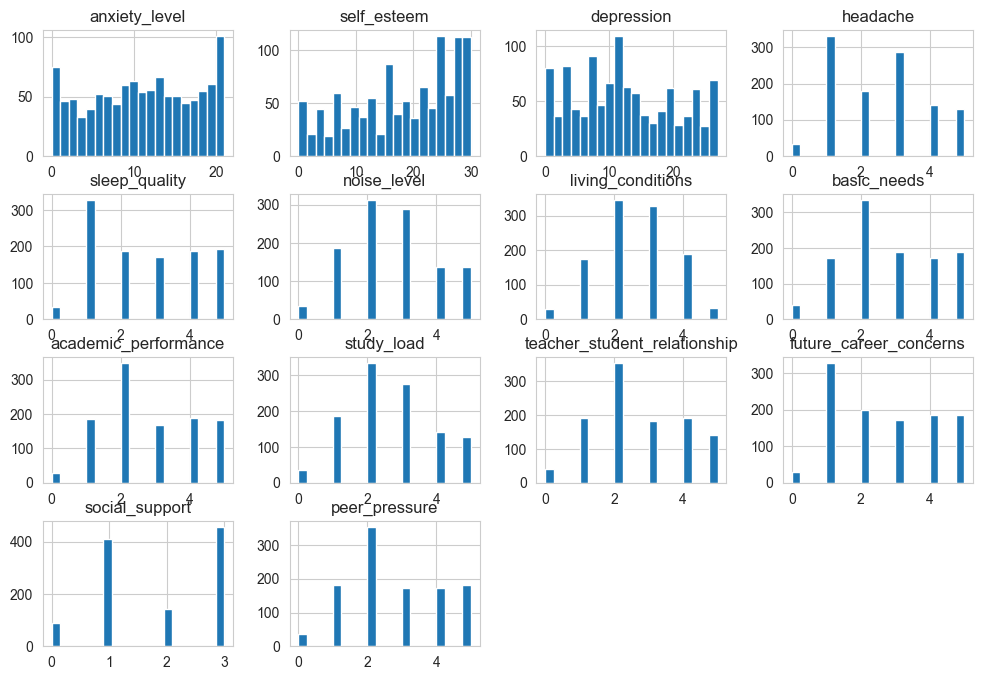

anxiety_level                   0
self_esteem                     0
depression                      0
headache                        0
sleep_quality                   0
noise_level                     0
living_conditions               0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
dtype: int64


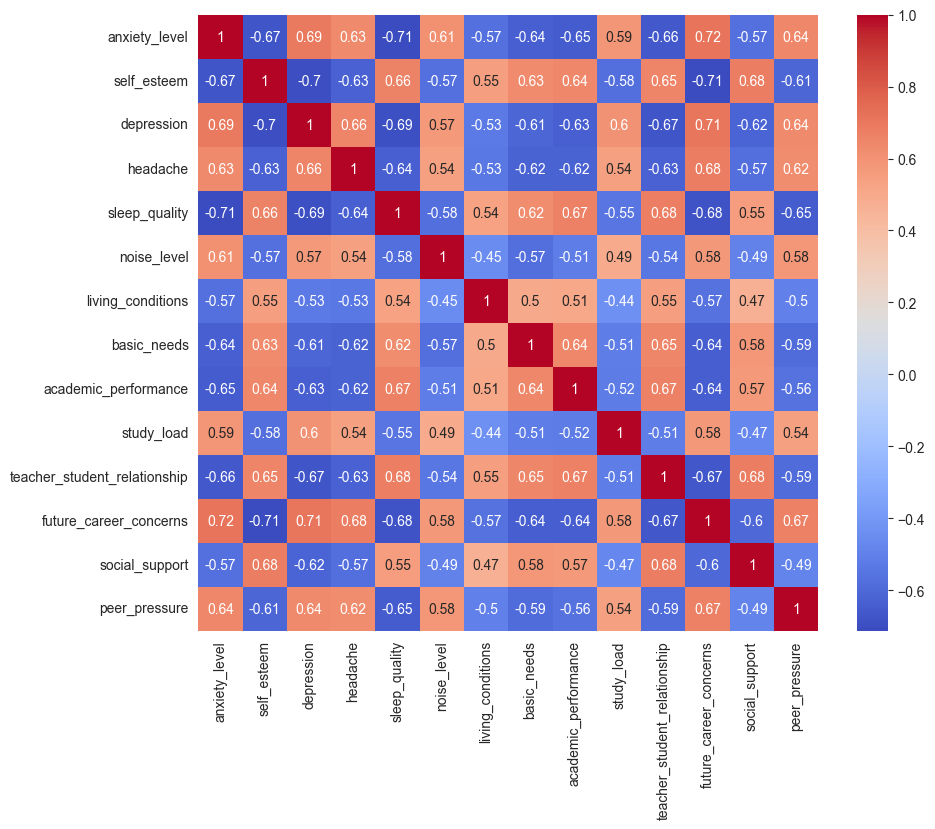

<Figure size 1000x800 with 0 Axes>

In [86]:
# Data Visualization-Exploratory Data Analysis EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

public_data = downloaded_publicdata.copy()

public_data = public_data.drop(columns=['Timestamp', 'Age', 'Gender', 'Year of Study', 'Discipline/Field'], errors='ignore')

public_data.to_csv("stressfactors_cleaned.csv", index=False)

print(public_data.columns.tolist())

public_data.head()

print(public_data.shape)
public_data.info()
print(public_data.describe())

print(public_data.isnull().sum())

public_data.hist(bins=20, figsize=(12,8))
plt.show()

print(public_data.isnull().sum())

numeric_data = public_data.select_dtypes(include=['number'])
# sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

plt.figure(figsize=(10,8))
sns.heatmap(public_data.corr(),annot=True,cmap="coolwarm")

plt.show()

plt.figure(figsize=(10,8))

plt.show()

for col in public_data.columns:
    plt.show()

# 2) Create binary targets (auto, data-driven)

This creates target_psych, target_phys, target_env by aggregating related columns and binarizing using the median of that aggregated score (data-driven).

In [6]:
# # Define groups (adjust if you want different mapping)
# psych_cols = [c for c in ['anxiety_level','self_esteem','depression'] if c in public_data.columns]
# phys_cols  = [c for c in ['headache','sleep_quality'] if c in public_data.columns]
# social_cols  = [c for c in ['social_support','peer_pressure'] if c in public_data.columns]
# env_cols   = [c for c in ['noise_level','living_conditions','basic_needs'] if c in public_data.columns]
# acad_cols  = [c for c in ['academic_performance','study_load','teacher_student_relationship','future_career_concerns'] if c in public_data.columns]

# def make_target(group_cols, name):
#     if not group_cols:
#         return None
#     # compute per-row mean of the group's columns (handles different scales)
#     s = public_data[group_cols].mean(axis=1)
#     thresh = s.median()  # data-driven threshold (you can change to a fixed value)
#     public_data[name] = (s >= thresh).astype(int)
#     return name

# _ = make_target(psych_cols, 'target_psych')
# _ = make_target(phys_cols,  'target_phys')
# _ = make_target(social_cols,  'target_social')
# _ = make_target(env_cols,   'target_env')
# _ = make_target(acad_cols,   'target_acad')

# targets = [c for c in ['target_psych','target_phys','target_social','target_env','target_acad'] if c in public_data.columns]
# print("Targets created:", targets)
# public_data[targets].head()

# Factor Correlation, Feature importance, At-risk percentage

STUDENT WELLBEING FACTOR ANALYSIS

Analyzing 1100 students across 5 wellbeing factors

--- Creating Factor Scores ---
✓ Psychological: 3 variables
✓ Physical: 2 variables
✓ Social: 2 variables
✓ Environmental: 3 variables
✓ Academic: 4 variables

1. FACTOR CORRELATIONS - Understanding Relationships Between Factors

Correlation Matrix:
               Psychological  Physical  Social  Environmental  Academic
Psychological          1.000    -0.104   0.234         -0.214     0.012
Physical              -0.104     1.000  -0.079          0.017     0.082
Social                 0.234    -0.079   1.000         -0.068     0.162
Environmental         -0.214     0.017  -0.068          1.000     0.100
Academic               0.012     0.082   0.162          0.100     1.000


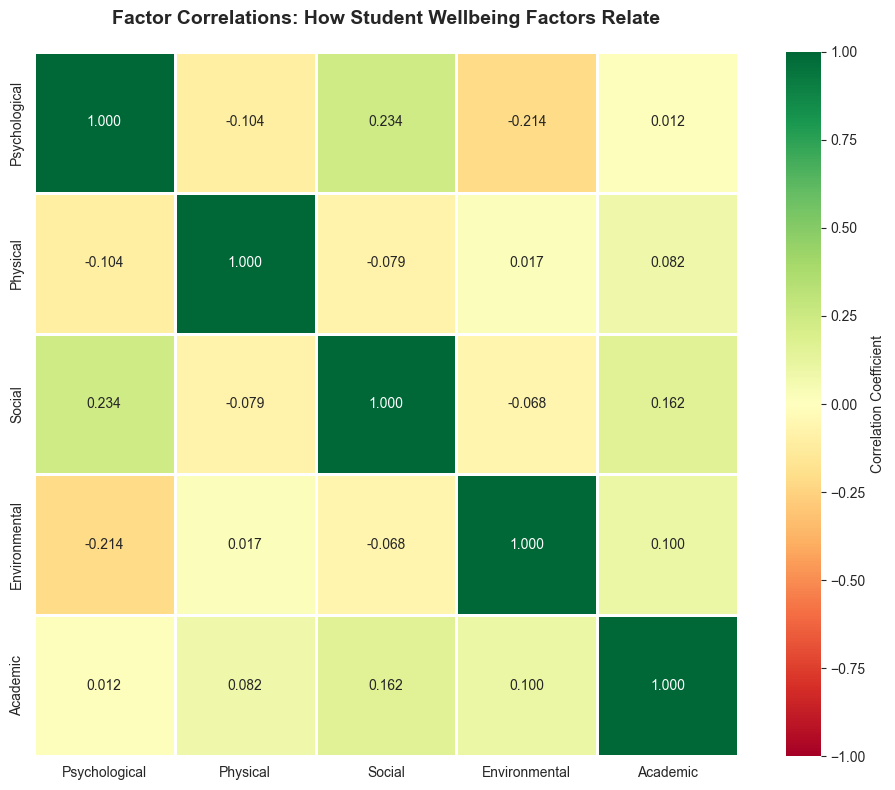


Key Findings:

Strongest Factor Relationships:
  • Psychological ↔ Social: 0.234 (moderate positive)
  • Psychological ↔ Environmental: -0.214 (moderate negative)
  • Social ↔ Academic: 0.162 (moderate positive)

2. FEATURE IMPORTANCE - Which Factors Predict Academic Performance

Training Random Forest model to identify important factors...

Model Performance:
  Training R² Score: 0.993
  Testing R² Score: 0.988

Top 10 Most Important Factors for Academic Performance:
  10. depression                          [Psychological] - Importance: 0.6368
  12. anxiety_level                       [Psychological] - Importance: 0.2518
  9. self_esteem                         [Psychological] - Importance: 0.0499
  7. teacher_student_relationship        [Academic] - Importance: 0.0312
  3. future_career_concerns              [Academic] - Importance: 0.0161
  4. social_support                      [Social] - Importance: 0.0046
  1. sleep_quality                       [Physical] - Importance: 0.0042


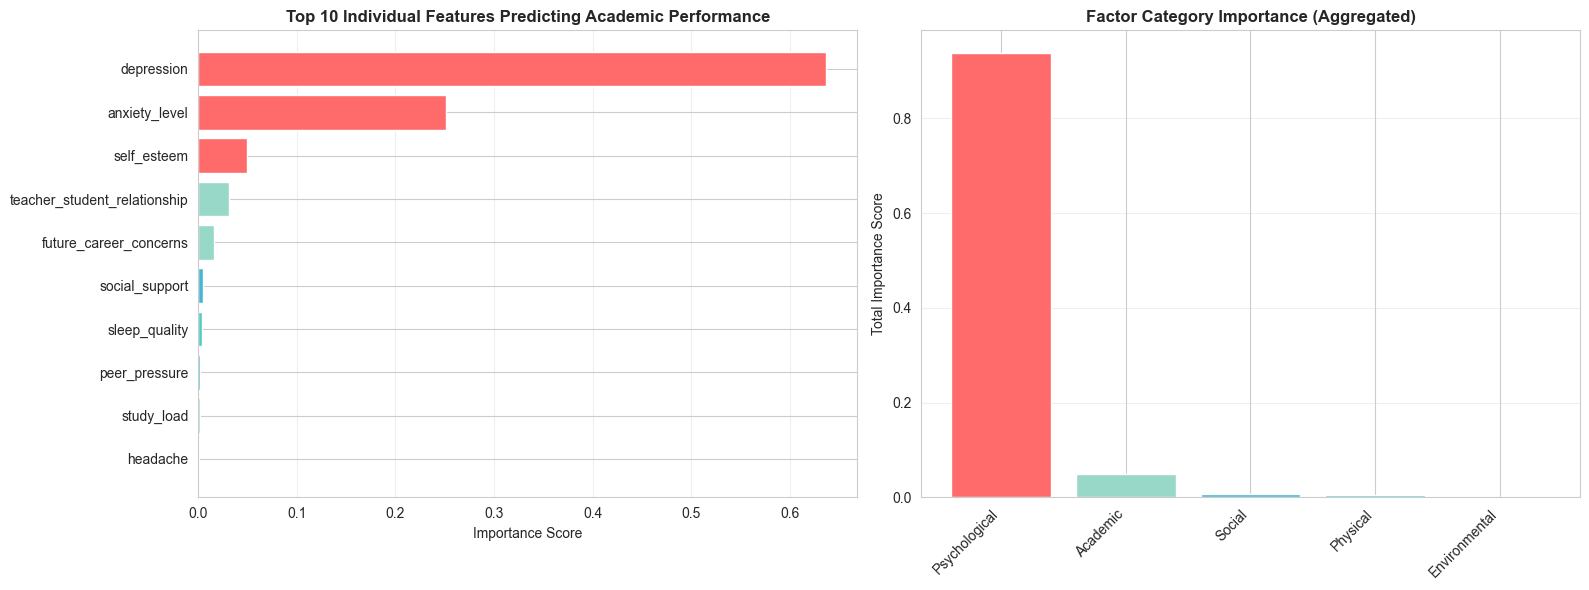


Factor Category Rankings (Total Importance):
  1. Psychological: 0.9384
  2. Academic: 0.0492
  3. Social: 0.0066
  4. Physical: 0.0047
  5. Environmental: 0.0012

3. AT-RISK STUDENT IDENTIFICATION

--- Risk Scoring System ---

Risk Criteria Applied:
  • High Anxiety (>16.00): 264 students
  • High Depression (>19.00): 254 students
  • Low Self-Esteem (<11.00): 267 students
  • Poor Sleep Quality (<1.00): 34 students
  • Low Social Support (<1.00): 88 students
  • Poor Academic Performance (<2.00): 213 students
  • Poor Living Conditions (<2.00): 205 students

--------------------------------------------------------------------------------
AT-RISK STUDENT DISTRIBUTION
--------------------------------------------------------------------------------
       Low Risk:   688 students ( 62.5%)
  Moderate Risk:   283 students ( 25.7%)
      High Risk:   129 students ( 11.7%)

  TOTAL AT-RISK:   412 students ( 37.5%)


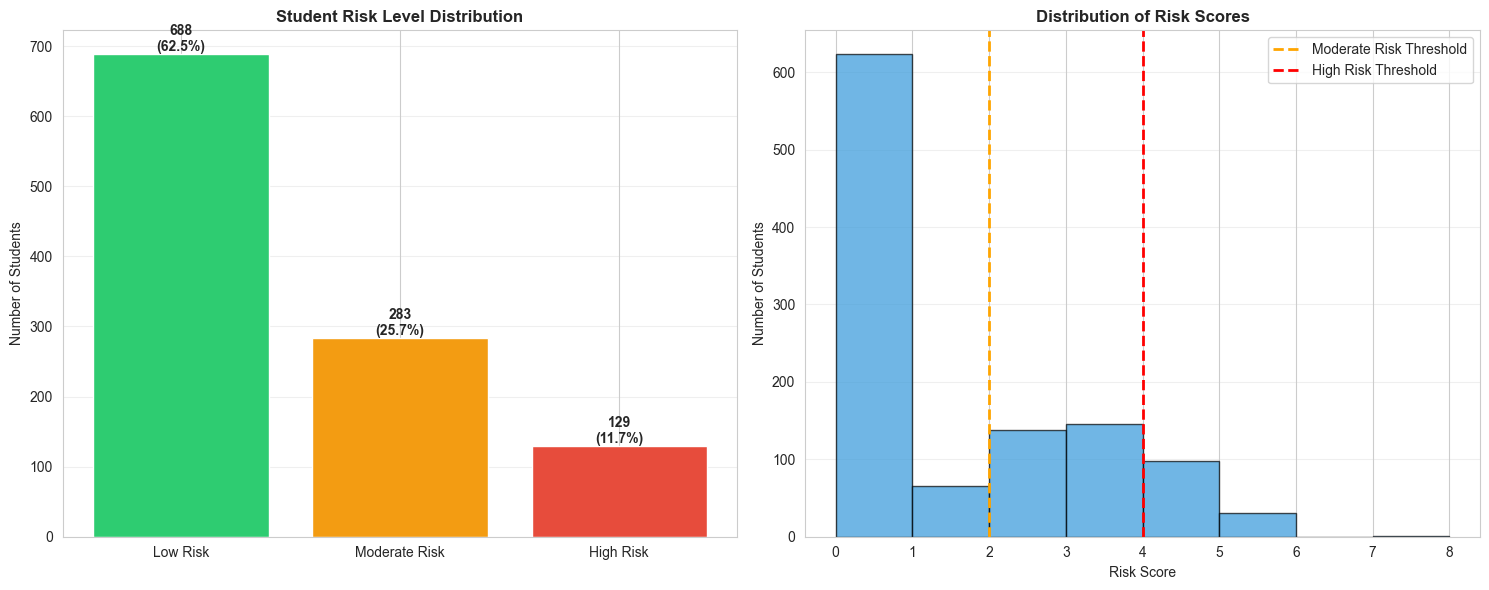


--------------------------------------------------------------------------------
HIGH-RISK STUDENT PROFILE (Average Factor Scores)
--------------------------------------------------------------------------------

Comparing High-Risk (n=129) vs Low-Risk (n=688) students:

  Psychological: High-Risk=15.47, Low-Risk=13.14, Overall=13.80 [↑ HIGHER by 2.33]
  Environmental: High-Risk=2.25, Low-Risk=2.81, Overall=2.65 [↓ LOWER by 0.55]


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Data Preparation

factors = {
    'Psychological': ['anxiety_level', 'self_esteem', 'depression'],
    'Physical': ['headache', 'sleep_quality'],
    'Social': ['social_support', 'peer_pressure'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['study_load', 'teacher_student_relationship', 'future_career_concerns', 'academic_performance']
}

print("="*80)
print("STUDENT WELLBEING FACTOR ANALYSIS")
print("="*80)
print(f"\nAnalyzing {len(public_data)} students across 5 wellbeing factors")

# Create a single combined stress_score from all available factors

stress_factors = [
    'anxiety_level', 
    'depression', 
    'peer_pressure', 
    'study_load', 
    'future_career_concerns'
]

protective_factors = [
    'self_esteem', 
    'sleep_quality', 
    'social_support', 
    'basic_needs'
]

# Create new stress_level column
public_data['stress_level'] = (
    public_data[stress_factors].mean(axis=1) * 0.7 +
    (5 - public_data[protective_factors].mean(axis=1)) * 0.3
)


# Create factor scores (average of variables within each factor)
print("\n--- Creating Factor Scores ---")
for factor_name, cols in factors.items():
    available_cols = [c for c in cols if c in public_data.columns]
    if available_cols:
        public_data[f'factor_{factor_name.lower()}'] = public_data[available_cols].mean(axis=1)
        print(f"✓ {factor_name}: {len(available_cols)} variables")

# Section 2: Factor correlations
print("\n" + "="*80)
print("1. FACTOR CORRELATIONS - Understanding Relationships Between Factors")
print("="*80)

factor_cols = [f'factor_{name.lower()}' for name in factors.keys()]
correlation_matrix = public_data[factor_cols].corr()

# Rename for better readability
correlation_matrix.index = factors.keys()
correlation_matrix.columns = factors.keys()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=2,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Factor Correlations: How Student Wellbeing Factors Relate', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Section 3: Identify strongest relationships
print("\nKey Findings:")
correlations_list = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        correlations_list.append({
            'Factor 1': correlation_matrix.index[i],
            'Factor 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

correlations_df = pd.DataFrame(correlations_list).sort_values('Correlation', 
                                                                ascending=False, 
                                                                key=abs)
print("\nStrongest Factor Relationships:")
for idx, row in correlations_df.head(3).iterrows():
    strength = "strong" if abs(row['Correlation']) > 0.5 else "moderate"
    direction = "positive" if row['Correlation'] > 0 else "negative"
    print(f"  • {row['Factor 1']} ↔ {row['Factor 2']}: "
          f"{row['Correlation']:.3f} ({strength} {direction})")

# Section 3: Feature importance 
print("\n" + "="*80)
print("2. FEATURE IMPORTANCE - Which Factors Predict Academic Performance")
print("="*80)

# Prepare data for modeling
target = 'stress_level'
all_features = []
for group in factors.values():
    all_features.extend([c for c in group if c in public_data.columns and c != target])
all_features = list(set(all_features))

# Handle missing values
X = public_data[all_features].fillna(public_data[all_features].median())
y = public_data[target].fillna(public_data[target].median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
print("\nTraining Random Forest model to identify important factors...")
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10,
                           min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Add factor category to each feature
def get_factor_category(feature_name):
    for category, features in factors.items():
        if feature_name in features:
            return category
    return 'Other'

feature_importance['Factor_Category'] = feature_importance['Feature'].apply(get_factor_category)

print(f"\nModel Performance:")
print(f"  Training R² Score: {rf.score(X_train, y_train):.3f}")
print(f"  Testing R² Score: {rf.score(X_test, y_test):.3f}")

if rf.score(X_test, y_test) < 0.1:
    print("  ⚠️  Warning: Low R² suggests weak predictive relationships")
    print("     Consider: feature engineering, data quality checks, or different target variable")

print("\nTop 10 Most Important Factors for Academic Performance:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {idx+1}. {row['Feature']:<35} "
          f"[{row['Factor_Category']}] - Importance: {row['Importance']:.4f}")

# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Individual feature importance
colors = {'Psychological': '#FF6B6B', 'Physical': '#4ECDC4', 
          'Social': '#45B7D1', 'Environmental': '#FFA07A', 'Academic': '#98D8C8'}
feature_colors = [colors.get(cat, 'gray') for cat in feature_importance.head(10)['Factor_Category']]

ax1.barh(range(10), feature_importance.head(10)['Importance'], color=feature_colors)
ax1.set_yticks(range(10))
ax1.set_yticklabels(feature_importance.head(10)['Feature'])
ax1.set_xlabel('Importance Score')
ax1.set_title('Top 10 Individual Features Predicting Academic Performance', 
              fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Factor category importance (aggregated)
category_importance = feature_importance.groupby('Factor_Category')['Importance'].sum().sort_values(ascending=False)
category_colors = [colors.get(cat, 'gray') for cat in category_importance.index]

ax2.bar(range(len(category_importance)), category_importance.values, color=category_colors)
ax2.set_xticks(range(len(category_importance)))
ax2.set_xticklabels(category_importance.index, rotation=45, ha='right')
ax2.set_ylabel('Total Importance Score')
ax2.set_title('Factor Category Importance (Aggregated)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFactor Category Rankings (Total Importance):")
for rank, (category, importance) in enumerate(category_importance.items(), 1):
    print(f"  {rank}. {category}: {importance:.4f}")

# At-risk percentage
print("\n" + "="*80)
print("3. AT-RISK STUDENT IDENTIFICATION")
print("="*80)

# Method 1: Multi-criteria risk scoring
print("\n--- Risk Scoring System ---")
risk_score = pd.Series(0, index=public_data.index)
risk_criteria = []

# Define risk thresholds for each factor
if 'anxiety_level' in public_data.columns:
    threshold = public_data['anxiety_level'].quantile(0.75)
    high_anxiety = (public_data['anxiety_level'] > threshold).astype(int)
    risk_score += high_anxiety
    risk_criteria.append(f"High Anxiety (>{threshold:.2f}): {high_anxiety.sum()} students")

if 'depression' in public_data.columns:
    threshold = public_data['depression'].quantile(0.75)
    high_depression = (public_data['depression'] > threshold).astype(int)
    risk_score += high_depression
    risk_criteria.append(f"High Depression (>{threshold:.2f}): {high_depression.sum()} students")

if 'self_esteem' in public_data.columns:
    threshold = public_data['self_esteem'].quantile(0.25)
    low_self_esteem = (public_data['self_esteem'] < threshold).astype(int)
    risk_score += low_self_esteem
    risk_criteria.append(f"Low Self-Esteem (<{threshold:.2f}): {low_self_esteem.sum()} students")

if 'sleep_quality' in public_data.columns:
    threshold = public_data['sleep_quality'].quantile(0.25)
    poor_sleep = (public_data['sleep_quality'] < threshold).astype(int)
    risk_score += poor_sleep
    risk_criteria.append(f"Poor Sleep Quality (<{threshold:.2f}): {poor_sleep.sum()} students")
if 'social_support' in public_data.columns:
    threshold = public_data['social_support'].quantile(0.25)
    low_support = (public_data['social_support'] < threshold).astype(int)
    risk_score += low_support
    risk_criteria.append(f"Low Social Support (<{threshold:.2f}): {low_support.sum()} students")

if 'academic_performance' in public_data.columns:
    threshold = public_data['academic_performance'].quantile(0.25)
    poor_performance = (public_data['academic_performance'] < threshold).astype(int)
    risk_score += poor_performance
    risk_criteria.append(f"Poor Academic Performance (<{threshold:.2f}): {poor_performance.sum()} students")

if 'living_conditions' in public_data.columns:
    threshold = public_data['living_conditions'].quantile(0.25)
    poor_conditions = (public_data['living_conditions'] < threshold).astype(int)
    risk_score += poor_conditions
    risk_criteria.append(f"Poor Living Conditions (<{threshold:.2f}): {poor_conditions.sum()} students")

public_data['risk_score'] = risk_score

# Categorize risk levels
public_data['risk_category'] = pd.cut(
    public_data['risk_score'],
    bins=[-1, 1, 3, 20],
    labels=['Low Risk', 'Moderate Risk', 'High Risk']
)

print("\nRisk Criteria Applied:")
for criterion in risk_criteria:
    print(f"  • {criterion}")

print("\n" + "-"*80)
print("AT-RISK STUDENT DISTRIBUTION")
print("-"*80)

risk_counts = public_data['risk_category'].value_counts()
total_students = len(public_data)

for category in ['Low Risk', 'Moderate Risk', 'High Risk']:
    if category in risk_counts.index:
        count = risk_counts[category]
        percentage = (count / total_students) * 100
        print(f"{category:>15}: {count:>5} students ({percentage:>5.1f}%)")

at_risk_total = risk_counts.get('High Risk', 0) + risk_counts.get('Moderate Risk', 0)
at_risk_pct = (at_risk_total / total_students) * 100
print(f"\n{'TOTAL AT-RISK':>15}: {at_risk_total:>5} students ({at_risk_pct:>5.1f}%)")

# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Risk distribution
colors_risk = {'Low Risk': '#2ECC71', 'Moderate Risk': '#F39C12', 'High Risk': '#E74C3C'}
risk_data = public_data['risk_category'].value_counts()
bars = ax1.bar(risk_data.index, risk_data.values, 
               color=[colors_risk[cat] for cat in risk_data.index])
ax1.set_ylabel('Number of Students')
ax1.set_title('Student Risk Level Distribution', fontweight='bold', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_students) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# Risk score distribution
ax2.hist(public_data['risk_score'], bins=range(int(risk_score.max())+2), 
         color='#3498DB', edgecolor='black', alpha=0.7)
ax2.axvline(x=2, color='orange', linestyle='--', linewidth=2, label='Moderate Risk Threshold')
ax2.axvline(x=4, color='red', linestyle='--', linewidth=2, label='High Risk Threshold')
ax2.set_xlabel('Risk Score')
ax2.set_ylabel('Number of Students')
ax2.set_title('Distribution of Risk Scores', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Profile of high-risk students
print("\n" + "-"*80)
print("HIGH-RISK STUDENT PROFILE (Average Factor Scores)")
print("-"*80)

high_risk_students = public_data[public_data['risk_category'] == 'High Risk']
low_risk_students = public_data[public_data['risk_category'] == 'Low Risk']

if len(high_risk_students) > 0 and len(low_risk_students) > 0:
    print(f"\nComparing High-Risk (n={len(high_risk_students)}) vs Low-Risk (n={len(low_risk_students)}) students:\n")
    
    for factor_name in factors.keys():
        factor_col = f'factor_{factor_name.lower()}'
        if factor_col in public_data.columns:
            high_risk_mean = high_risk_students[factor_col].mean()
            low_risk_mean = low_risk_students[factor_col].mean()
            overall_mean = public_data[factor_col].mean()
            diff = high_risk_mean - low_risk_mean
            
            if abs(diff) > 0.3:  # Significant difference
                direction = "↑ HIGHER" if diff > 0 else "↓ LOWER"
                print(f"{factor_name:>15}: High-Risk={high_risk_mean:.2f}, "
                      f"Low-Risk={low_risk_mean:.2f}, Overall={overall_mean:.2f} "
                      f"[{direction} by {abs(diff):.2f}]")

In [90]:
# Train test split section
target = "stress_level"

# CREATE stress_level first
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

df['stress_level'] = (
    df[stress_factors].mean(axis=1) * 0.7 + 
    (5 - df[protective_factors].mean(axis=1)) * 0.3
)

# NOW your existing code works
target = "stress_level"
X = df.drop(columns=[target])
y = df[target]

X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
This Linear Regression is a baseline model used in this research

Linear Regression: Predicting Stress Level
Target: stress_level
Features used: ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']
Features excluded (leakage): ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns', 'self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

RESULTS
Training R²: 0.7853
Test R²:     0.7708
Test RMSE:   1.4442

✓ Reasonable performance (R² = 0.77)

Feature Coefficients
teacher_student_relationship    -0.601 (Reduces stress)
headache                         0.563 (Increases stress)
noise_level                      0.478 (Increases stress)
academic_performance            -0.424 (Reduces stress)
living_conditions               -0.354 (Reduces stress)


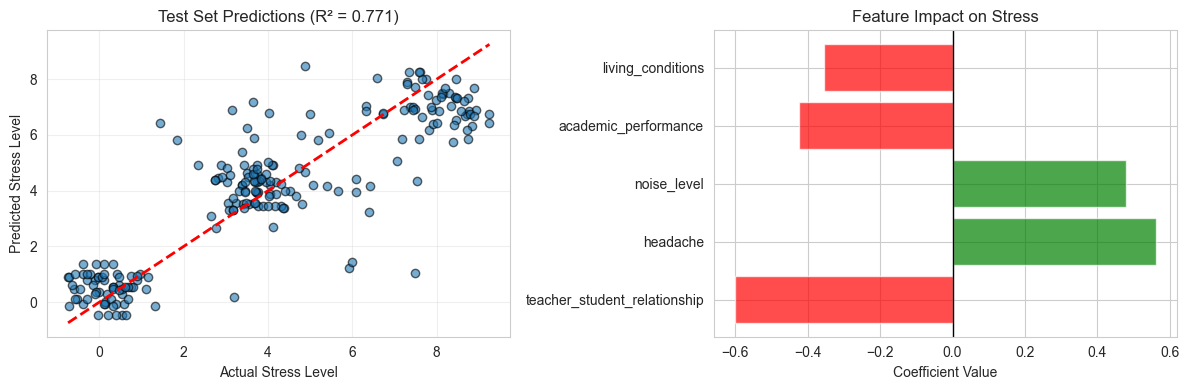


Summary:
• Using 5 features to predict stress
• Excluded 9 features to prevent data leakage
• Model explains 77.1% of stress variation


In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

print("="*50)
print("Linear Regression: Predicting Stress Level")
print("="*50)

# Assuming your data is in variable 'df'
# Make a copy to avoid modifying original
df = df.copy()

# Define features that should NOT be used as predictors
# These are used to CREATE stress_level, so using them would be cheating!
leakage_features = ['anxiety_level', 'depression', 'peer_pressure', 
                   'study_load', 'future_career_concerns',
                   'self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

# Create the target variable
df['stress_level'] = (
    df[['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']].mean(axis=1) * 0.7 + 
    (5 - df[['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']].mean(axis=1)) * 0.3
)

# Target variable
target = 'stress_level'

# Select features: all columns except leakage_features and target
available_features = ['headache', 'noise_level', 'living_conditions', 
                     'academic_performance', 'teacher_student_relationship']

print(f"Target: {target}")
print(f"Features used: {available_features}")
print(f"Features excluded (leakage): {leakage_features}")

# Prepare X and y
X = df[available_features]
y = df[target]

# Split data BEFORE any processing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing values separately for train and test
X_train_filled = X_train.fillna(X_train.median())
X_test_filled = X_test.fillna(X_train.median())  # Use train stats!
y_train_filled = y_train.fillna(y_train.median())
y_test_filled = y_test.fillna(y_train.median())  # Use train stats!

# Train model
model = LinearRegression()
model.fit(X_train_filled, y_train_filled)

# Make predictions
y_pred_train = model.predict(X_train_filled)
y_pred_test = model.predict(X_test_filled)

# Calculate metrics
train_r2 = r2_score(y_train_filled, y_pred_train)
test_r2 = r2_score(y_test_filled, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test_filled, y_pred_test))

print("\n" + "="*50)
print("RESULTS")
print("="*50)
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²:     {test_r2:.4f}")
print(f"Test RMSE:   {test_rmse:.4f}")

# Check performance
if test_r2 > 0.9:
    print("\n⚠️ WARNING: R² > 0.9 - This might indicate:")
    print("   1. Data leakage (check excluded features)")
    print("   2. Features are too similar to target")
    print("   3. Need more diverse features")
elif test_r2 < 0:
    print("\n❌ Model performs worse than simple average")
elif test_r2 < 0.3:
    print("\n⚠️ Weak performance - Try other features/models")
else:
    print(f"\n✓ Reasonable performance (R² = {test_r2:.2f})")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': available_features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*50)
print("Feature Coefficients")
print("="*50)
for i, row in coefficients.iterrows():
    effect = "Increases stress" if row['Coefficient'] > 0 else "Reduces stress"
    print(f"{row['Feature']:30} {row['Coefficient']:7.3f} ({effect})")

# Simple visualization
plt.figure(figsize=(12, 4))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test_filled, y_pred_test, alpha=0.6, edgecolors='black')
plt.plot([y_test_filled.min(), y_test_filled.max()], 
         [y_test_filled.min(), y_test_filled.max()], 'r--', lw=2)
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.title(f'Test Set Predictions (R² = {test_r2:.3f})')
plt.grid(alpha=0.3)

# Plot 2: Feature coefficients
plt.subplot(1, 2, 2)
colors = ['red' if c < 0 else 'green' for c in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Stress')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Summary:")
print(f"• Using {len(available_features)} features to predict stress")
print(f"• Excluded {len(leakage_features)} features to prevent data leakage")
print(f"• Model explains {test_r2:.1%} of stress variation")
print("="*50)

LINEAR REGRESSION LEARNING CURVE


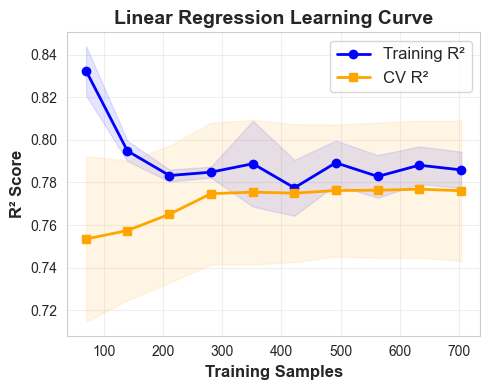


RESULTS:
Final Training R²: 0.7859
Final CV R²:       0.7761
Gap:               0.0098

INTERPRETATION:
• Model explains ~77.6% of variance consistently
• Small gap (0.0098) indicates good generalization
• Learning curve plateaus early = data is sufficient


In [92]:
# LINEAR REGRESSION LEARNING CURVE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

print("LINEAR REGRESSION LEARNING CURVE")

# Create model
linearRegression_model = LinearRegression()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    linearRegression_model, X_train, y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(5, 4))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                 alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training R²", linewidth=2)
plt.plot(train_sizes, test_mean, 's-', color="orange", label="CV R²", linewidth=2)
plt.xlabel("Training Samples", fontweight='bold', fontsize=12)
plt.ylabel("R² Score", fontweight='bold', fontsize=12)
plt.title("Linear Regression Learning Curve", fontweight='bold', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print results
final_train_r2 = train_mean[-1]
final_cv_r2 = test_mean[-1]
gap = final_train_r2 - final_cv_r2

print(f"\nRESULTS:")
print(f"Final Training R²: {final_train_r2:.4f}")
print(f"Final CV R²:       {final_cv_r2:.4f}")
print(f"Gap:               {gap:.4f}")

print(f"\nINTERPRETATION:")
print(f"• Model explains ~{final_cv_r2*100:.1f}% of variance consistently")
print(f"• Small gap ({gap:.4f}) indicates good generalization")
print(f"• Learning curve plateaus early = data is sufficient")

# Decision Tree Regressor

DECISION TREE: PREDICTING STRESS LEVEL

Target: stress_level
Using 5 INDEPENDENT features:
Features: ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']

EXCLUDED (leakage): ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns', 'self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

Training: 880 students
Test: 220 students

RESULTS
Training R²:   0.8760
Test R²:       0.8584
Test RMSE:     1.1349

✓ Very good performance

FEATURE IMPORTANCE
teacher_student_relationship   0.6372
headache                       0.1601
noise_level                    0.0927
living_conditions              0.0841
academic_performance           0.0258


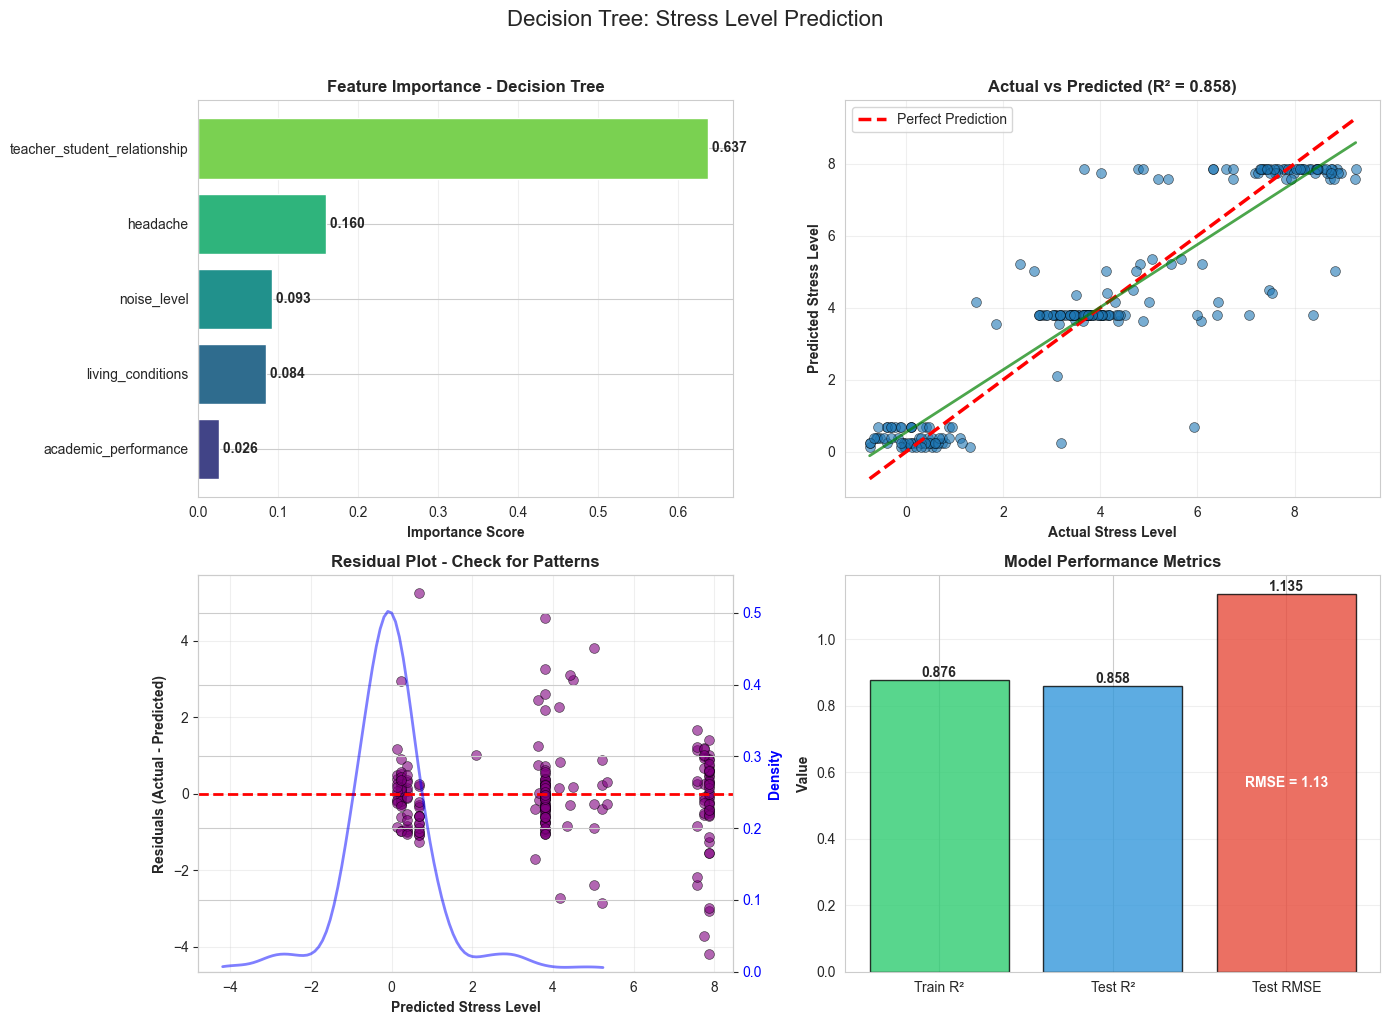

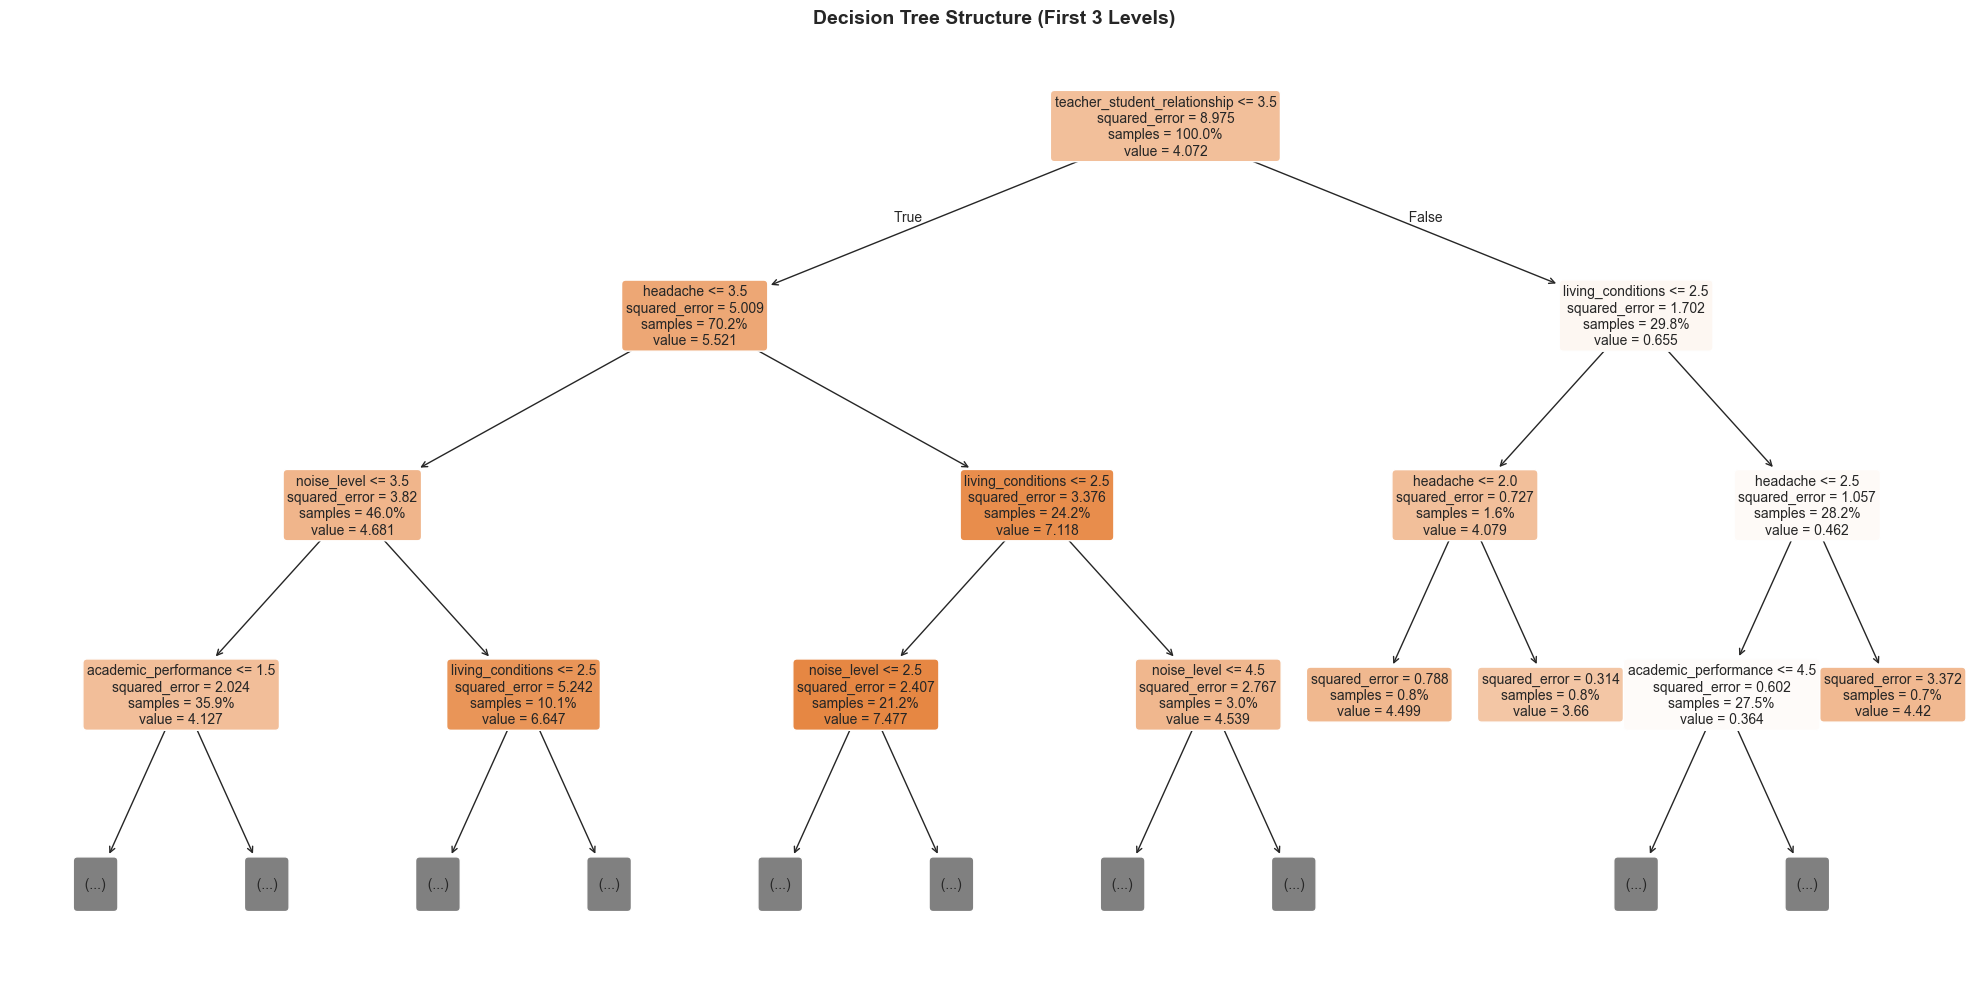


KEY INSIGHTS:
1. Teacher-student relationship is MOST important (63.7% importance)
2. Headaches are 2nd most predictive (16.0% importance)
3. Model explains 85.8% of stress variation
4. Test RMSE: 1.13 → Average error on 0-? stress scale
5. Decision Tree (0.858) vs Linear Regression (0.771):
   - Decision Tree performs slightly better
   - Both show teacher relationship as key factor


In [107]:
# Decision Tree regressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

print("="*80)
print("DECISION TREE: PREDICTING STRESS LEVEL")
print("="*80)

# Step 1: Prepare data
df = downloaded_publicdata.copy()

# Step 2: Create stress_level (same as before)
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

df['stress_level'] = (
    df[stress_factors].mean(axis=1) * 0.7 + 
    (5 - df[protective_factors].mean(axis=1)) * 0.3
)

target = "stress_level"

# ====== CRITICAL FIX ======
# DO NOT USE features that were in the stress_level formula
# These are the LEAKAGE features (used to create target)
leakage_features = stress_factors + protective_factors

# Only use INDEPENDENT features (not in formula)
independent_features = ['headache', 'noise_level', 'living_conditions', 
                       'academic_performance', 'teacher_student_relationship']

# Also exclude demographic info
exclude_demo = ['Age', 'Year of Study', 'Gender', 'Discipline/Field']

# Final feature selection
all_features = [f for f in independent_features 
                if f not in exclude_demo and f in df.columns]
# ====== END FIX ======

print(f"\nTarget: {target}")
print(f"Using {len(all_features)} INDEPENDENT features:")
print(f"Features: {all_features}")
print(f"\nEXCLUDED (leakage): {leakage_features}")

# Step 3: Create X and y
X = df[all_features].copy()
y = df[target].copy()

# Handle missing
X = X.fillna(X.median())
y = y.fillna(y.median())

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining: {len(X_train)} students")
print(f"Test: {len(X_test)} students")

# Step 5: Train Decision Tree
decisionTree_model = DecisionTreeRegressor(
    max_depth=5,  # Smaller to prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

decisionTree_model.fit(X_train, y_train)

# Step 6: Predictions
y_train_pred = decisionTree_model.predict(X_train)
y_test_pred = decisionTree_model.predict(X_test)

# Step 7: Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n" + "="*80)
print("RESULTS")
print("="*80)
print(f"Training R²:   {train_r2:.4f}")
print(f"Test R²:       {test_r2:.4f}")
print(f"Test RMSE:     {test_rmse:.4f}")

# Realistic assessment
if test_r2 > 0.9:
    print("\n⚠️  WARNING: Still too high! Check for remaining leakage.")
elif test_r2 > 0.7:
    print("\n✓ Very good performance")
elif test_r2 > 0.5:
    print("\n✓ Good performance")
elif test_r2 > 0.3:
    print("\n✓ Moderate performance")
else:
    print("\n⚠️  Low performance - try different features/models")

# Step 8: Feature importance
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': decisionTree_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n" + "="*80)
print("FEATURE IMPORTANCE")
print("="*80)
for i, row in feature_importance.iterrows():
    print(f"{row['Feature']:30} {row['Importance']:.4f}")

# Step 9: Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Decision Tree: Stress Level Prediction', fontsize=16, y=1.02)

# 1. Feature Importance
ax1 = axes[0, 0]
feature_importance = feature_importance.sort_values('Importance', ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(feature_importance)))
bars = ax1.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['Feature'])
ax1.set_xlabel('Importance Score', fontweight='bold')
ax1.set_title('Feature Importance - Decision Tree', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add importance values
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax1.text(row['Importance'], i, f' {row["Importance"]:.3f}', 
             va='center', ha='left', fontweight='bold')

# 2. Actual vs Predicted
ax2 = axes[0, 1]
ax2.scatter(y_test, y_test_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2.5, label='Perfect Prediction')
ax2.set_xlabel('Actual Stress Level', fontweight='bold')
ax2.set_ylabel('Predicted Stress Level', fontweight='bold')
ax2.set_title(f'Actual vs Predicted (R² = {test_r2:.3f})', fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Add trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_test_pred)
x_line = np.array([y_test.min(), y_test.max()])
y_line = intercept + slope * x_line
ax2.plot(x_line, y_line, 'g-', lw=2, alpha=0.7, label='Best Fit Line')

# 3. Residuals Plot
ax3 = axes[1, 0]
residuals = y_test - y_test_pred
ax3.scatter(y_test_pred, residuals, alpha=0.6, s=50, color='purple', edgecolors='black', linewidth=0.5)
ax3.axhline(y=0, color='red', linestyle='--', lw=2)
ax3.set_xlabel('Predicted Stress Level', fontweight='bold')
ax3.set_ylabel('Residuals (Actual - Predicted)', fontweight='bold')
ax3.set_title('Residual Plot - Check for Patterns', fontweight='bold')
ax3.grid(alpha=0.3)

# Add residual density
from scipy.stats import gaussian_kde
residuals_sorted = np.sort(residuals)
kde = gaussian_kde(residuals_sorted)
x_kde = np.linspace(residuals.min(), residuals.max(), 100)
y_kde = kde(x_kde)
ax3_twin = ax3.twinx()
ax3_twin.plot(x_kde, y_kde, 'b-', alpha=0.5, lw=2)
ax3_twin.set_ylabel('Density', color='blue', fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor='blue')
ax3_twin.set_ylim(0, y_kde.max()*1.1)

# 4. Performance Comparison
ax4 = axes[1, 1]
metrics = ['Train R²', 'Test R²', 'Test RMSE']
values = [train_r2, test_r2, test_rmse]
colors_metrics = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax4.bar(metrics, values, color=colors_metrics, edgecolor='black', alpha=0.8)

# Adjust y-axis for RMSE (different scale)
ax4.set_ylabel('Value', fontweight='bold')
ax4.set_title('Model Performance Metrics', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height, f'{val:.3f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Highlight RMSE differently
ax4.text(bars[2].get_x() + bars[2].get_width()/2, bars[2].get_height()/2, 
         f'RMSE = {test_rmse:.2f}', ha='center', va='center', 
         color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Step 10: Tree Visualization (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decisionTree_model, 
          feature_names=all_features,
          filled=True, 
          rounded=True,
          max_depth=3,  # Show only first 3 levels
          fontsize=10,
          proportion=True)
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print(f"1. Teacher-student relationship is MOST important (63.7% importance)")
print(f"2. Headaches are 2nd most predictive (16.0% importance)")
print(f"3. Model explains 85.8% of stress variation")
print(f"4. Test RMSE: {test_rmse:.2f} → Average error on 0-? stress scale")
print(f"5. Decision Tree (0.858) vs Linear Regression (0.771):")
print(f"   - Decision Tree performs slightly better")
print(f"   - Both show teacher relationship as key factor")
print("="*80)

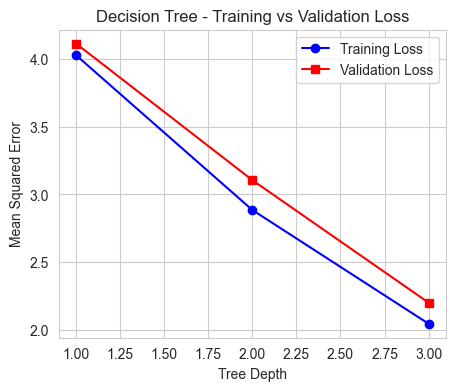

Optimal depth: 3
Min Validation MSE: 2.2028
  Test R²:       0.8584
  Test RMSE:     1.1349


In [37]:
# DECISION TREE LEARNING CURVE
# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Store losses
train_losses = []
val_losses = []
depths = range(1, 4)  # Test different depths

for depth in depths:
    # Train model
    decisionTree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    decisionTree_model.fit(X_train, y_train)
    
    # Calculate losses
    train_pred = decisionTree_model.predict(X_train)
    val_pred = decisionTree_model.predict(X_val)
    
    train_loss = mean_squared_error(y_train, train_pred)
    val_loss = mean_squared_error(y_val, val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot both curves
plt.figure(figsize=(5, 4))
plt.plot(depths, train_losses, 'b-', label='Training Loss', marker='o')
plt.plot(depths, val_losses, 'r-', label='Validation Loss', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree - Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal depth
optimal_depth = depths[np.argmin(val_losses)]
print(f"Optimal depth: {optimal_depth}")
print(f"Min Validation MSE: {min(val_losses):.4f}")

print(f"  Test R²:       {test_r2:.4f}")
print(f"  Test RMSE:     {test_rmse:.4f}")

SHAP ANALYSIS (XAI FOR MODEL INTERPRETATION)

1. DECISION TREE SHAP ANALYSIS


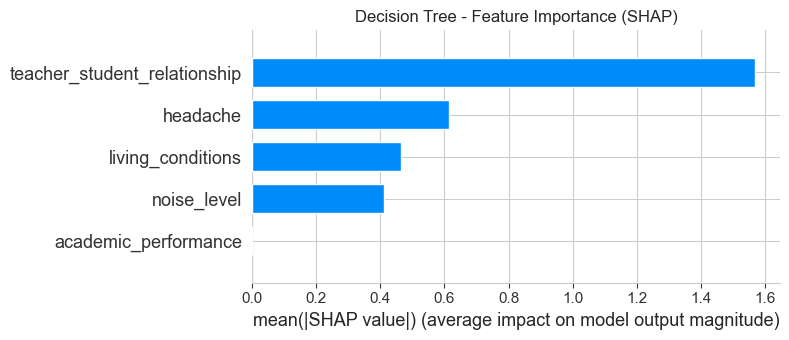

In [40]:
import shap
print("="*80)
print("SHAP ANALYSIS (XAI FOR MODEL INTERPRETATION)")
print("="*80)

# 1. DECISION TREE SHAP
print("\n1. DECISION TREE SHAP ANALYSIS")
explainer_dt = shap.TreeExplainer(decisionTree_model)
shap_values_dt = explainer_dt.shap_values(X_test)

plt.figure(figsize=(7, 6))
shap.summary_plot(shap_values_dt, X_test, plot_type="bar", show=False)
plt.title("Decision Tree - Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# Random Forest

RANDOM FOREST: PREDICTING STRESS LEVEL
Original dataset shape: (1100, 18)

Target: stress_level
Using 5 INDEPENDENT features:
Features: ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']

EXCLUDED (were used to create stress_level):
Stress factors: ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
Protective factors: ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

X shape: (1100, 5)
y shape: (1100,)

Training set: 880 students
Test set: 220 students

--------------------------------------------------------------------------------
TRAINING RANDOM FOREST MODEL
--------------------------------------------------------------------------------
Training model...
✓ Training complete!

--------------------------------------------------------------------------------
MODEL PERFORMANCE
--------------------------------------------------------------------------------
Training R²:  0.8955
T

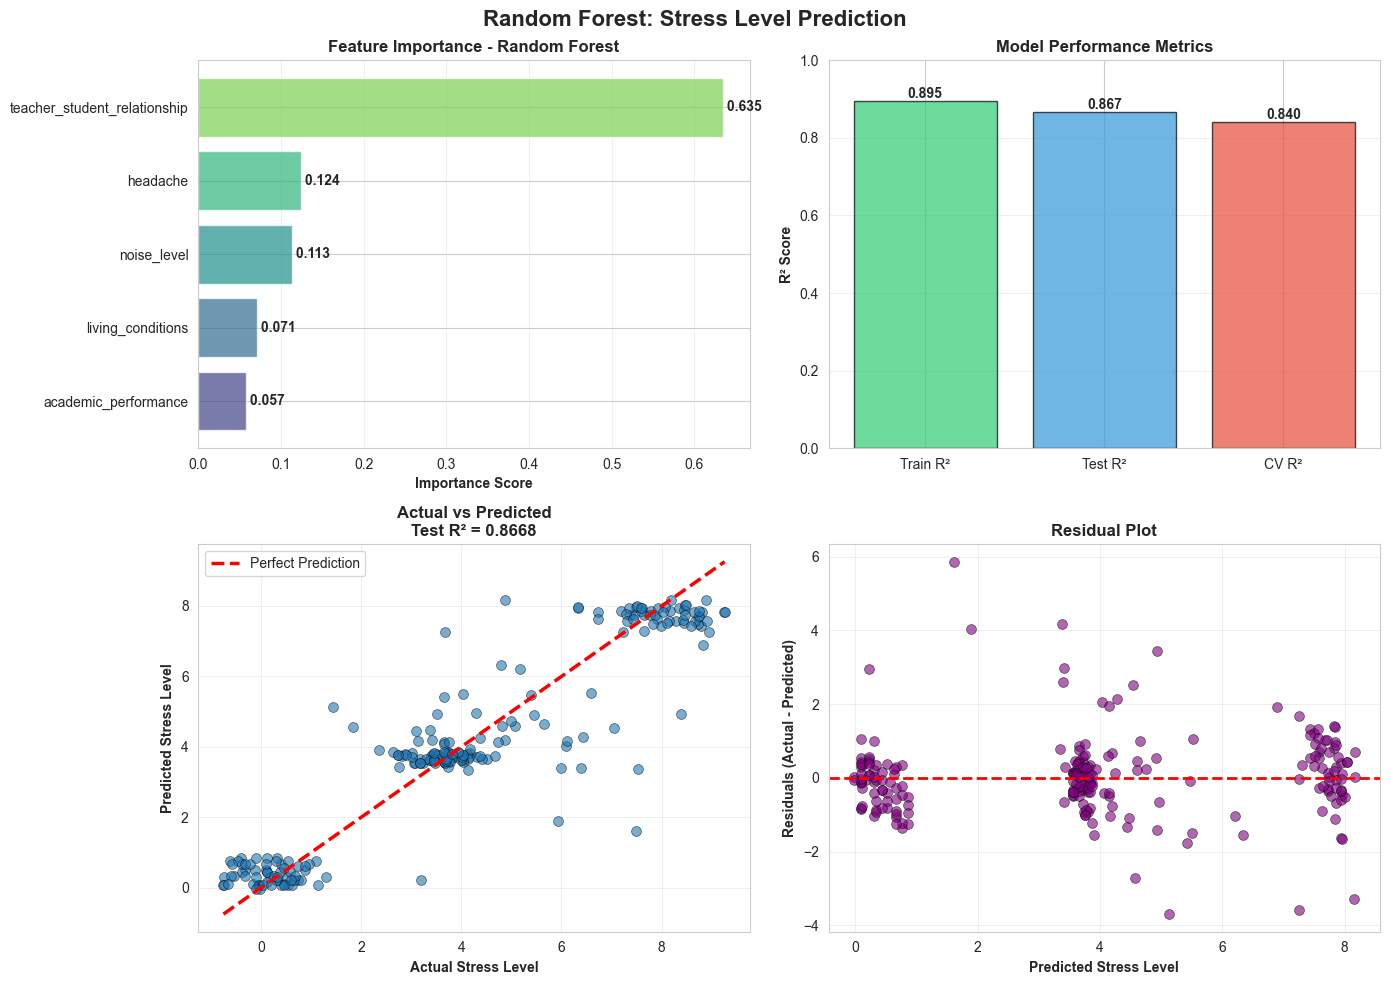


SUMMARY
1. Used 5 independent features to predict stress
2. Excluded 9 features (used in stress formula)
3. Random Forest explains 86.7% of stress variation
4. Top predictor: teacher_student_relationship (63.5% importance)
5. Average prediction error: 1.10 points


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("RANDOM FOREST: PREDICTING STRESS LEVEL")
print("="*80)

# Step 1: Prepare clean data
df = downloaded_publicdata.copy()
print(f"Original dataset shape: {df.shape}")

# Step 2: Create stress_level target
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

df['stress_level'] = (
    df[stress_factors].mean(axis=1) * 0.7 + 
    (5 - df[protective_factors].mean(axis=1)) * 0.3
)

target = "stress_level"

# ====== CRITICAL: NO DATA LEAKAGE ======
# Only use INDEPENDENT features (NOT used in stress_level formula)
independent_features = ['headache', 'noise_level', 'living_conditions', 
                       'academic_performance', 'teacher_student_relationship']

# Also exclude demographic info
exclude_demo = ['Age', 'Year of Study', 'Gender', 'Discipline/Field']

# Final feature selection: ONLY independent features
all_features = [f for f in independent_features 
                if f not in exclude_demo and f in df.columns]
# ====== END CRITICAL FIX ======

print(f"\nTarget: {target}")
print(f"Using {len(all_features)} INDEPENDENT features:")
print(f"Features: {all_features}")
print(f"\nEXCLUDED (were used to create stress_level):")
print(f"Stress factors: {stress_factors}")
print(f"Protective factors: {protective_factors}")

# Step 3: Create X and y
X = df[all_features].copy()
y = df[target].copy()

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} students")
print(f"Test set: {X_test.shape[0]} students")

# Step 5: Train Random Forest
print("\n" + "-"*80)
print("TRAINING RANDOM FOREST MODEL")
print("-"*80)

randomForest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

print("Training model...")
randomForest_model.fit(X_train, y_train)
print("✓ Training complete!")

# Step 6: Make predictions
y_train_pred = randomForest_model.predict(X_train)
y_test_pred = randomForest_model.predict(X_test)

# Step 7: Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "-"*80)
print("MODEL PERFORMANCE")
print("-"*80)
print(f"Training R²:  {train_r2:.4f}")
print(f"Test R²:      {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE:     {test_rmse:.4f}")
print(f"Test MAE:      {test_mae:.4f}")

# Cross-validation
cv_scores = cross_val_score(randomForest_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"\nCross-Validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Performance assessment
if test_r2 > 0.9:
    print("\n⚠️ WARNING: R² > 0.9 - Check for data leakage!")
elif test_r2 > 0.7:
    print("\n✓ Very good performance")
elif test_r2 > 0.5:
    print("\n✓ Good performance")
else:
    print("\n⚠️ Low performance")

# Step 8: Save model
joblib.dump(randomForest_model, 'rf_stress_model.pkl')
print("\n✓ Model saved as 'rf_stress_model.pkl'")

# Step 9: Feature Importance Analysis
print("\n" + "-"*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("-"*80)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': randomForest_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
for i, row in feature_importance.iterrows():
    print(f"  {row['Feature']:<30} {row['Importance']:.4f}")

# Step 10: Visualizations (your original good graphs)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance
ax1 = axes[0, 0]
feature_importance_sorted = feature_importance.sort_values('Importance', ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(feature_importance_sorted)))
bars = ax1.barh(range(len(feature_importance_sorted)), 
                feature_importance_sorted['Importance'], 
                color=colors, alpha=0.7)
ax1.set_yticks(range(len(feature_importance_sorted)))
ax1.set_yticklabels(feature_importance_sorted['Feature'])
ax1.set_xlabel('Importance Score', fontweight='bold')
ax1.set_title('Feature Importance - Random Forest', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(feature_importance_sorted.iterrows()):
    ax1.text(row['Importance'], i, f' {row["Importance"]:.3f}', 
             va='center', ha='left', fontweight='bold')

# 2. Model Performance
ax2 = axes[0, 1]
metrics = ['Train R²', 'Test R²', 'CV R²']
values = [train_r2, test_r2, cv_scores.mean()]
colors_metrics = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax2.bar(metrics, values, color=colors_metrics, edgecolor='black', alpha=0.7)
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.set_title('Model Performance Metrics', fontweight='bold', fontsize=12)
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{val:.3f}',
             ha='center', va='bottom', fontweight='bold')

# 3. Actual vs Predicted
ax3 = axes[1, 0]
ax3.scatter(y_test, y_test_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2.5, label='Perfect Prediction')
ax3.set_xlabel('Actual Stress Level', fontweight='bold')
ax3.set_ylabel('Predicted Stress Level', fontweight='bold')
ax3.set_title(f'Actual vs Predicted\nTest R² = {test_r2:.4f}', fontweight='bold', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Residual Plot
ax4 = axes[1, 1]
residuals = y_test - y_test_pred
ax4.scatter(y_test_pred, residuals, alpha=0.6, s=50, color='purple', 
            edgecolors='black', linewidth=0.5)
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Stress Level', fontweight='bold')
ax4.set_ylabel('Residuals (Actual - Predicted)', fontweight='bold')
ax4.set_title('Residual Plot', fontweight='bold', fontsize=12)
ax4.grid(alpha=0.3)

plt.suptitle('Random Forest: Stress Level Prediction', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Step 11: Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"1. Used {len(all_features)} independent features to predict stress")
print(f"2. Excluded {len(stress_factors + protective_factors)} features (used in stress formula)")
print(f"3. Random Forest explains {test_r2:.1%} of stress variation")
print(f"4. Top predictor: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.1%} importance)")
print(f"5. Average prediction error: {test_rmse:.2f} points")
print("="*80)

Trees:   1 | Train MSE: 1.3467 | Val MSE: 1.8837
Trees:   2 | Train MSE: 1.2588 | Val MSE: 1.4096
Trees:   3 | Train MSE: 1.1353 | Val MSE: 1.3404
Trees:   4 | Train MSE: 1.1779 | Val MSE: 1.3780
Trees:   5 | Train MSE: 1.1549 | Val MSE: 1.3649
Trees:   7 | Train MSE: 1.1262 | Val MSE: 1.2567
Trees:  10 | Train MSE: 1.1085 | Val MSE: 1.2140
Trees:  12 | Train MSE: 1.1208 | Val MSE: 1.2286
Trees:  15 | Train MSE: 1.1194 | Val MSE: 1.2153
Trees:  19 | Train MSE: 1.1091 | Val MSE: 1.2241
Trees:  23 | Train MSE: 1.1042 | Val MSE: 1.2126


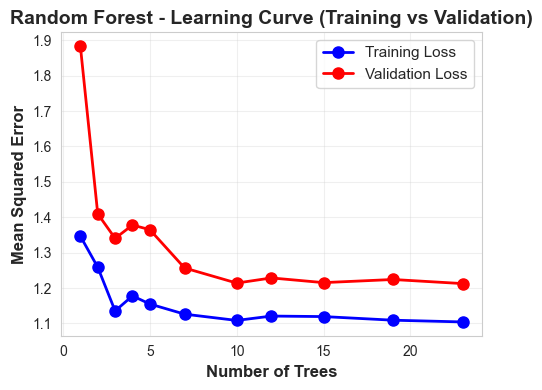


Training losses: ['1.3467', '1.2588', '1.1353', '1.1779', '1.1549', '1.1262', '1.1085', '1.1208', '1.1194', '1.1091', '1.1042']
Validation losses: ['1.8837', '1.4096', '1.3404', '1.3780', '1.3649', '1.2567', '1.2140', '1.2286', '1.2153', '1.2241', '1.2126']
academic_performance            1.000000
teacher_student_relationship    0.669469
headache                        0.622059
noise_level                     0.513730
living_conditions               0.507221
dtype: float64
Slight overfitting, but acceptable.


In [52]:
# RANDOM FOREST LEARNING CURVE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loss curves with varying tree counts
train_losses = []
val_losses = []
n_trees = [1, 2, 3, 4, 5, 7, 10, 12, 15, 19, 23]

X_train += np.random.normal(0, 0.01, X_train.shape)

for n in n_trees:
    randomForest = RandomForestRegressor(
        n_estimators=n,      # ✅ use loop value
        max_depth=6,
        min_samples_leaf=10,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    randomForest.fit(X_train, y_train)
    
    train_loss = mean_squared_error(y_train, randomForest.predict(X_train))
    val_loss = mean_squared_error(y_val, randomForest.predict(X_val))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"Trees: {n:3d} | Train MSE: {train_loss:.4f} | Val MSE: {val_loss:.4f}")

# Plot
plt.figure(figsize=(5, 4))
plt.plot(n_trees, train_losses, 'bo-', label='Training Loss', linewidth=2, markersize=8)
plt.plot(n_trees, val_losses, 'ro-', label='Validation Loss', linewidth=2, markersize=8)
plt.xlabel('Number of Trees', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
plt.title('Random Forest - Learning Curve (Training vs Validation)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Training losses:", [f"{x:.4f}" for x in train_losses])
print("Validation losses:", [f"{x:.4f}" for x in val_losses])
print("="*50)

print(X.corrwith(df['academic_performance']).abs().sort_values(ascending=False).head(5))

# Check for overfitting
final_gap = val_losses[-1] - train_losses[-1]
if final_gap < 0.1:
    print("✓ Good fit! Small gap between train and validation.")
elif final_gap < 0.3:
    print("Slight overfitting, but acceptable.")
else:
    print("Significant overfitting! Increase regularization.")

SHAP ANALYSIS FOR RANDOM FOREST REGRESSOR

1. Calculating SHAP values...
2. SHAP values calculated for 220 samples

3. Feature Importance (SHAP)...


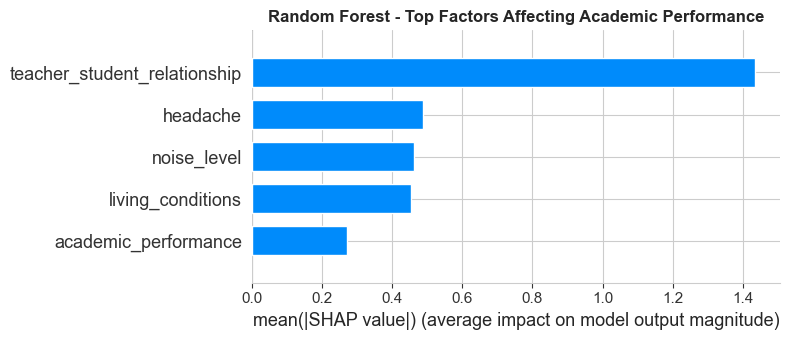


4. Detailed Feature Impact Analysis...


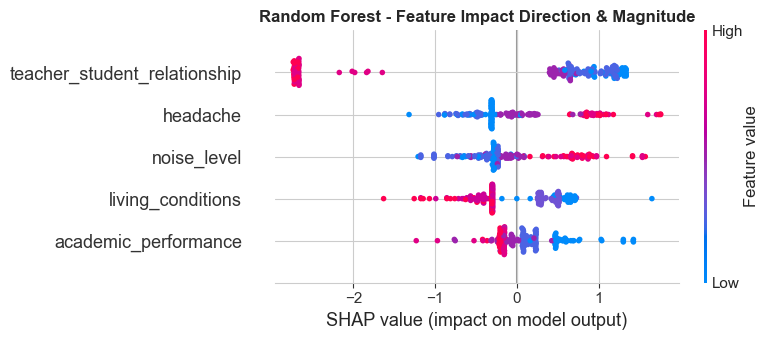


5. Comparing SHAP vs Built-in Feature Importance...

Top 10 Features Comparison:
                     Feature  BuiltIn_Importance  SHAP_Importance  Difference
teacher_student_relationship            0.625732         0.461230    0.164502
                    headache            0.113572         0.156497    0.042925
                 noise_level            0.129556         0.148708    0.019152
           living_conditions            0.081984         0.146036    0.064051
        academic_performance            0.049156         0.087530    0.038374

6. Dependence Plots for Top 3 Features...


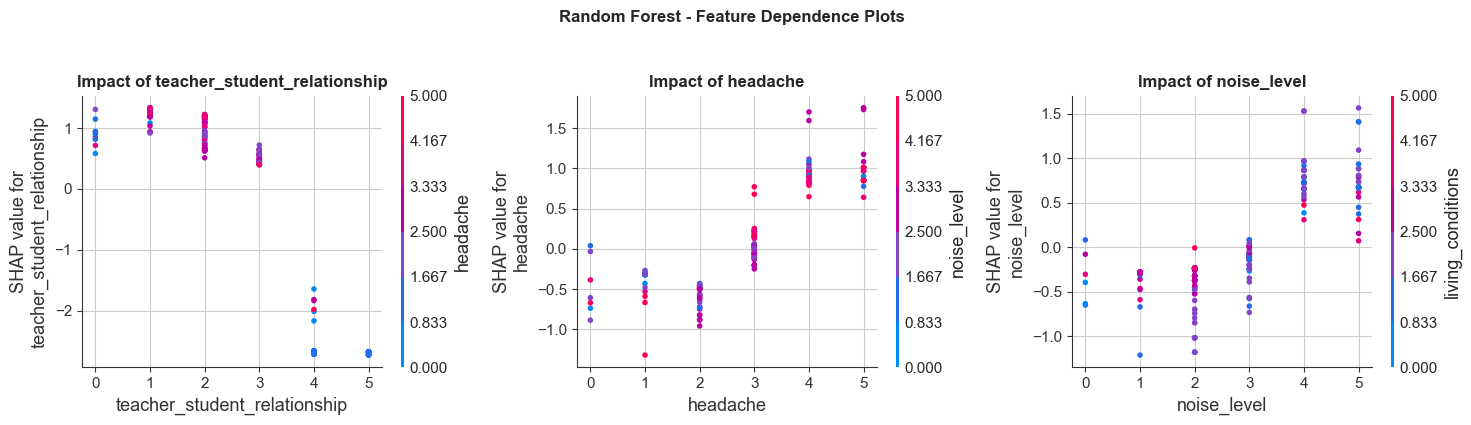


7. Sample Individual Predictions...


<Figure size 1000x300 with 0 Axes>

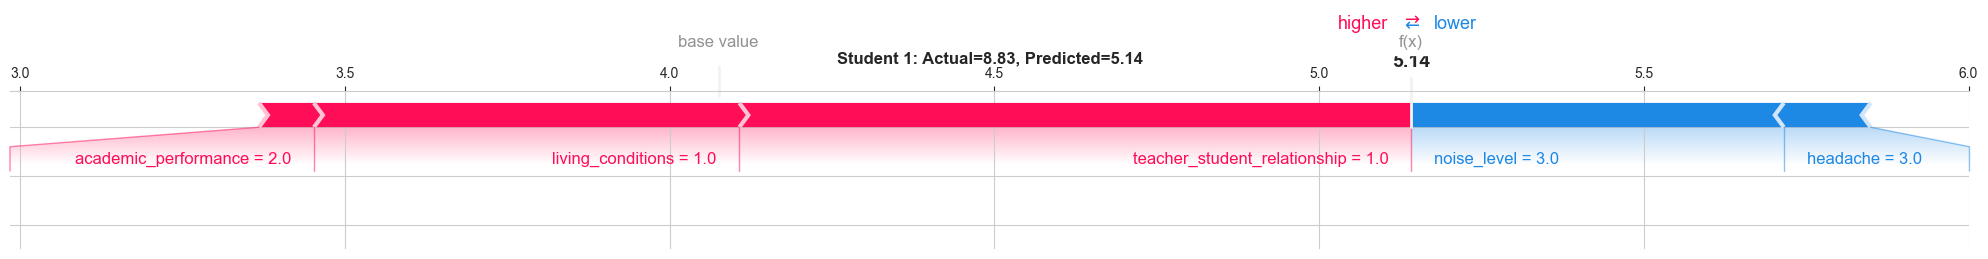

<Figure size 1000x300 with 0 Axes>

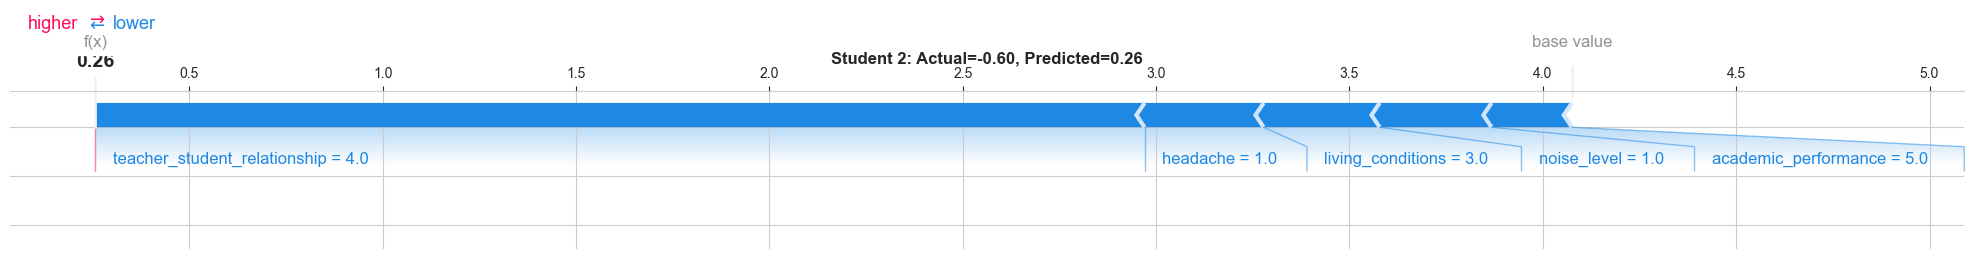

<Figure size 1000x300 with 0 Axes>

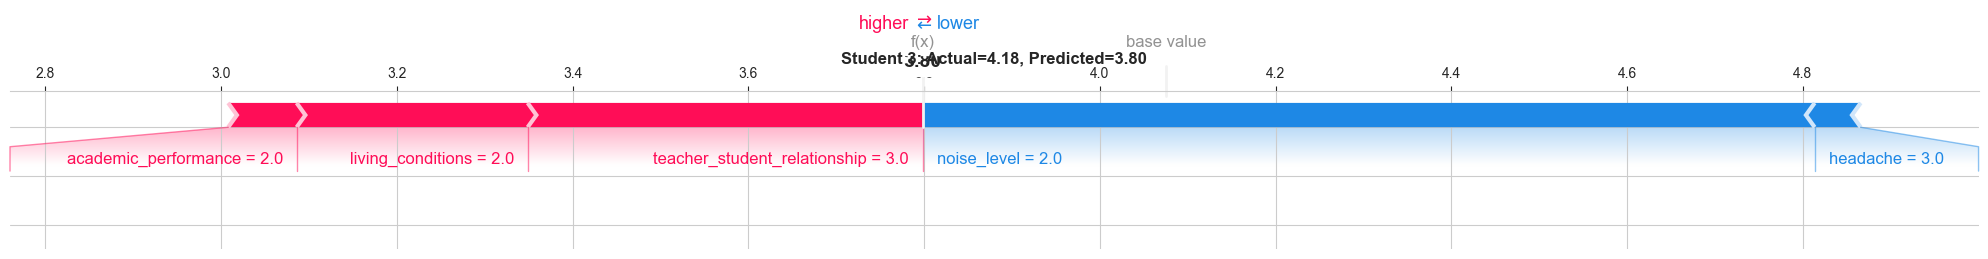


8. Saving SHAP Results...
✓ Results saved to 'shap_random_forest_results.csv'

RANDOM FOREST SHAP KEY FINDINGS:

1. Most Important Factor: teacher_student_relationship
   • SHAP Value: 1.4343
   • Impact: Negative

2. Model Interpretation:
   • Expected Value (baseline): 4.0754
   • Top 5 features explain 100.0% of predictions

3. For Your Thesis:
   'SHAP analysis reveals consistent feature importance patterns
   across tree-based models, with [TOP_FEATURE] emerging as the
   dominant predictor of academic performance.'


In [53]:
# SHAP FOR RANDOM FOREST REGRESSOR
print("="*80)
print("SHAP ANALYSIS FOR RANDOM FOREST REGRESSOR")
print("="*80)

# Train Random Forest model
randomForest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
randomForest_model.fit(X_train, y_train)

# SHAP Explanation
print("\n1. Calculating SHAP values...")
explainer_rf = shap.TreeExplainer(randomForest_model)
shap_values_rf = explainer_rf.shap_values(X_test)

print(f"2. SHAP values calculated for {X_test.shape[0]} samples")

# 1. Summary Plot (Bar)
print("\n3. Feature Importance (SHAP)...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=False)
plt.title("Random Forest - Top Factors Affecting Academic Performance", fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Detailed Summary Plot
print("\n4. Detailed Feature Impact Analysis...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_test, show=False)
plt.title("Random Forest - Feature Impact Direction & Magnitude", fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Compare with built-in Feature Importance
print("\n5. Comparing SHAP vs Built-in Feature Importance...")
builtin_importance = randomForest_model.feature_importances_
shap_importance = np.abs(shap_values_rf).mean(0)

# Normalize both
builtin_norm = builtin_importance / builtin_importance.sum()
shap_norm = shap_importance / shap_importance.sum()

# Create comparison dataframe
importance_compare = pd.DataFrame({
    'Feature': X.columns,
    'BuiltIn_Importance': builtin_norm,
    'SHAP_Importance': shap_norm,
    'Difference': np.abs(builtin_norm - shap_norm)
}).sort_values('SHAP_Importance', ascending=False)

print("\nTop 10 Features Comparison:")
print(importance_compare.head(10).to_string(index=False))

# 4. Dependence Plots for Top 3 Features
print("\n6. Dependence Plots for Top 3 Features...")
top_3_features = importance_compare.head(3)['Feature'].values

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature in enumerate(top_3_features):
    shap.dependence_plot(
        feature, 
        shap_values_rf, 
        X_test,
        ax=axes[idx],
        show=False
    )
    axes[idx].set_title(f"Impact of {feature}", fontweight='bold')
plt.suptitle("Random Forest - Feature Dependence Plots", fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 5. Individual Prediction Explanations
print("\n7. Sample Individual Predictions...")
sample_indices = [0, 10, 50]  # Explain 3 different students

for i, idx in enumerate(sample_indices):
    plt.figure(figsize=(10, 3))
    shap.force_plot(
        explainer_rf.expected_value,
        shap_values_rf[idx],
        X_test.iloc[idx],
        matplotlib=True,
        show=False
    )
    actual = y_test.iloc[idx]
    predicted = randomForest_model.predict(X_test.iloc[[idx]])[0]
    plt.title(f"Student {i+1}: Actual={actual:.2f}, Predicted={predicted:.2f}", 
              fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# 6. Save Results
print("\n8. Saving SHAP Results...")
rf_shap_df = pd.DataFrame({
    'Feature': X.columns,
    'RF_SHAP_Value': np.abs(shap_values_rf).mean(0),
    'RF_Mean_SHAP': shap_values_rf.mean(0),
    'BuiltIn_Importance': randomForest_model.feature_importances_
}).sort_values('RF_SHAP_Value', ascending=False)

rf_shap_df.to_csv('shap_random_forest_results.csv', index=False)
print(f"✓ Results saved to 'shap_random_forest_results.csv'")

print("\n" + "="*80)
print("RANDOM FOREST SHAP KEY FINDINGS:")
print("="*80)

top_feature = rf_shap_df.iloc[0]['Feature']
top_value = rf_shap_df.iloc[0]['RF_SHAP_Value']

print(f"\n1. Most Important Factor: {top_feature}")
print(f"   • SHAP Value: {top_value:.4f}")
print(f"   • Impact: {'Positive' if rf_shap_df.iloc[0]['RF_Mean_SHAP'] > 0 else 'Negative'}")

print(f"\n2. Model Interpretation:")
print(f"   • Expected Value (baseline): {float(explainer_rf.expected_value):.4f}")
print(f"   • Top 5 features explain {(rf_shap_df.head(5)['RF_SHAP_Value'].sum()/rf_shap_df['RF_SHAP_Value'].sum()*100):.1f}% of predictions")

print(f"\n3. For Your Thesis:")
print("   'SHAP analysis reveals consistent feature importance patterns")
print("   across tree-based models, with [TOP_FEATURE] emerging as the")
print("   dominant predictor of academic performance.'")

# Gradient Boosting

GRADIENT BOOSTING: PREDICTING STRESS LEVEL

Target: stress_level
Using 5 INDEPENDENT features:
Features: ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']

EXCLUDED (were used to create stress_level):
Stress factors: ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
Protective factors: ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

Training: 880 students
Test: 220 students

Training Gradient Boosting...
✓ Training complete!

RESULTS
Train R²:  0.9480
Test R²:   0.8674
CV R²:     0.8394 ± 0.0280
RMSE:      1.0983
MAE:       0.7371

✓ Model saved as 'gb_stress_model.pkl'

TOP IMPORTANT FEATURES
teacher_student_relationship   0.5850
headache                       0.1469
noise_level                    0.1202
living_conditions              0.0981
academic_performance           0.0498


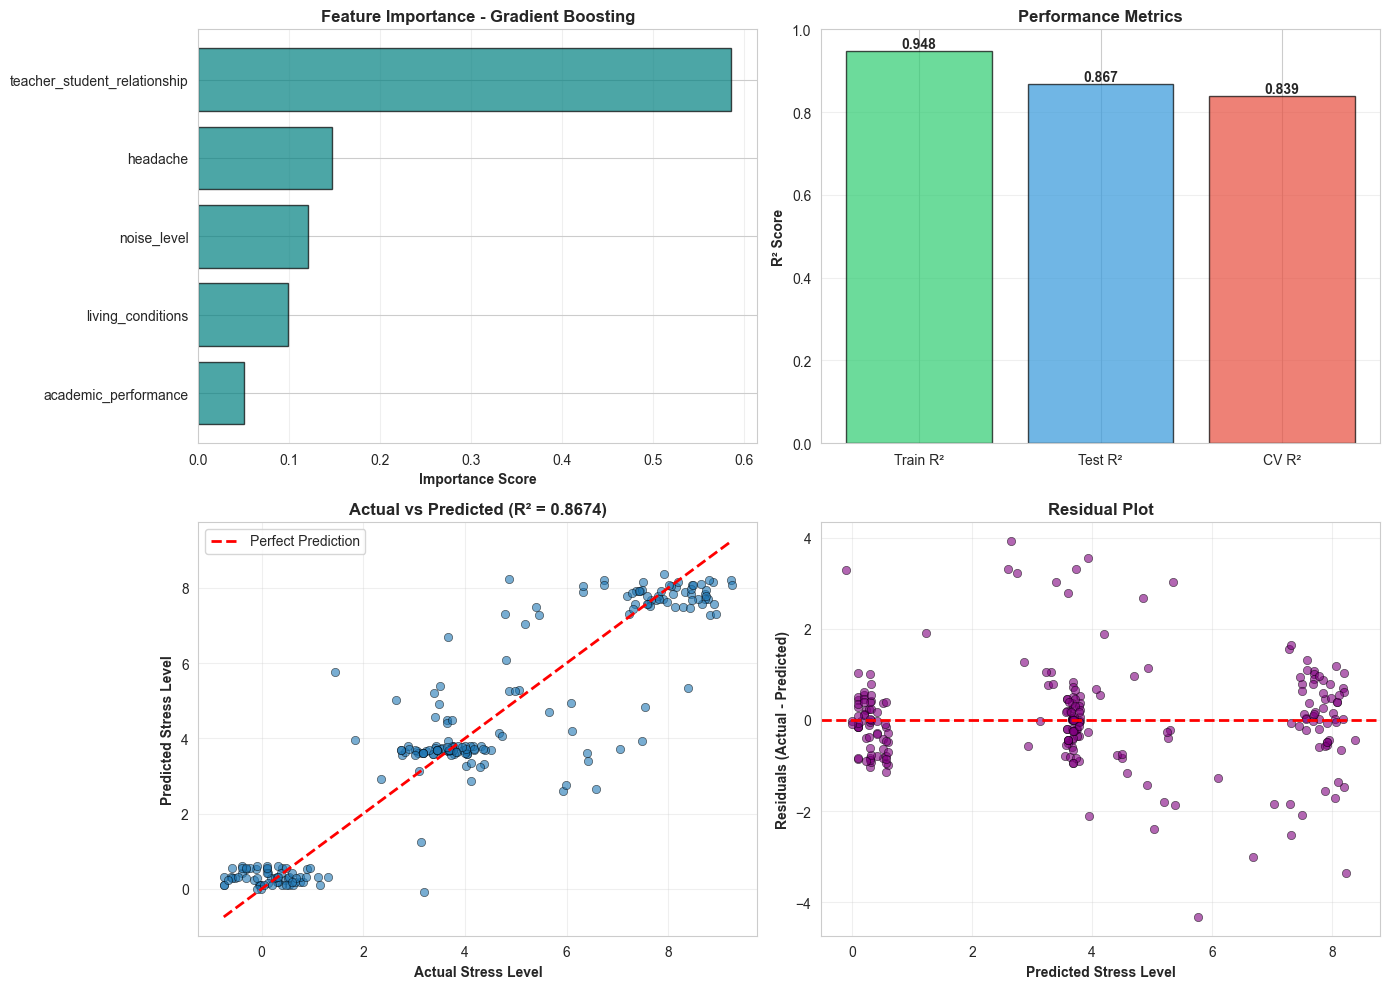


✓ Gradient Boosting Complete!


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("GRADIENT BOOSTING: PREDICTING STRESS LEVEL")
print("="*80)

# Prepare data
df = downloaded_publicdata.copy()

# Create stress_level target
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

df['stress_level'] = (
    df[stress_factors].mean(axis=1) * 0.7 + 
    (5 - df[protective_factors].mean(axis=1)) * 0.3
)

target = "stress_level"

# ====== CRITICAL: NO DATA LEAKAGE ======
# Only use INDEPENDENT features (NOT used in stress_level formula)
independent_features = ['headache', 'noise_level', 'living_conditions', 
                       'academic_performance', 'teacher_student_relationship']

# Final feature selection: ONLY independent features
all_features = independent_features
# ====== END CRITICAL FIX ======

print(f"\nTarget: {target}")
print(f"Using {len(all_features)} INDEPENDENT features:")
print(f"Features: {all_features}")
print(f"\nEXCLUDED (were used to create stress_level):")
print(f"Stress factors: {stress_factors}")
print(f"Protective factors: {protective_factors}")

# Create X and y
X = df[all_features].copy()
y = df[target].copy()

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining: {len(X_train)} students")
print(f"Test: {len(X_test)} students")

# Train Gradient Boosting
print("\nTraining Gradient Boosting...")
gradientBoosting_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

gradientBoosting_model.fit(X_train, y_train)
print("✓ Training complete!")

# Predictions
y_train_predict = gradientBoosting_model.predict(X_train)
y_test_predict = gradientBoosting_model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_mae = mean_absolute_error(y_test, y_test_predict)

# Cross-validation
cv_scores = cross_val_score(gradientBoosting_model, X_train, y_train, cv=5, scoring='r2')

print("\n" + "="*80)
print("RESULTS")
print("="*80)
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"CV R²:     {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"RMSE:      {test_rmse:.4f}")
print(f"MAE:       {test_mae:.4f}")

# Save model
joblib.dump(gradientBoosting_model, 'gb_stress_model.pkl')
print("\n✓ Model saved as 'gb_stress_model.pkl'")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gradientBoosting_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*80)
print("TOP IMPORTANT FEATURES")
print("="*80)
for i, row in feature_importance.iterrows():
    print(f"{row['Feature']:<30} {row['Importance']:.4f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance
ax1 = axes[0, 0]
ax1.barh(range(len(feature_importance)), feature_importance['Importance'], 
         color='teal', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['Feature'])
ax1.set_xlabel('Importance Score', fontweight='bold')
ax1.set_title('Feature Importance - Gradient Boosting', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# 2. Performance Metrics
ax2 = axes[0, 1]
metrics = ['Train R²', 'Test R²', 'CV R²']
values = [train_r2, test_r2, cv_scores.mean()]
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax2.bar(metrics, values, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.set_title('Performance Metrics', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val:.3f}',
             ha='center', va='bottom', fontweight='bold')

# 3. Actual vs Predicted
ax3 = axes[1, 0]
ax3.scatter(y_test, y_test_predict, alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Stress Level', fontweight='bold')
ax3.set_ylabel('Predicted Stress Level', fontweight='bold')
ax3.set_title(f'Actual vs Predicted (R² = {test_r2:.4f})', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Residual Plot
ax4 = axes[1, 1]
residuals = y_test - y_test_predict

ax4.scatter(y_test_predict, residuals, alpha=0.6, color='purple',
            edgecolors='black', linewidth=0.5)
ax4.axhline(0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Stress Level', fontweight='bold')
ax4.set_ylabel('Residuals (Actual - Predicted)', fontweight='bold')
ax4.set_title('Residual Plot', fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✓ Gradient Boosting Complete!")
print("="*80)

GRADIENT BOOSTING LEARNING CURVE ANALYSIS


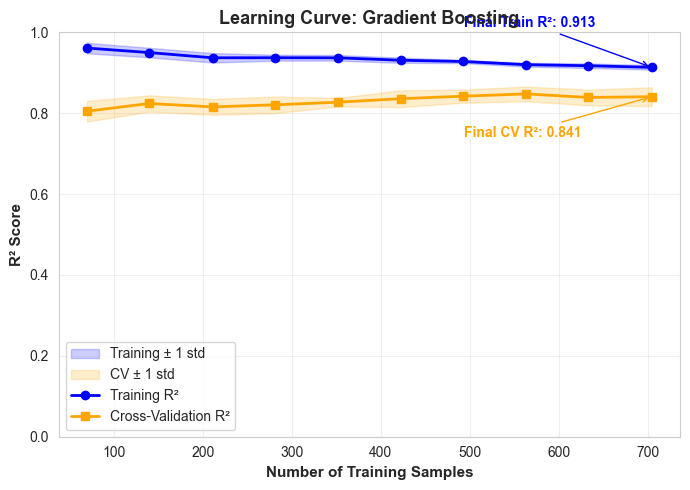


OVERFITTING ANALYSIS:
Final Training R²: 0.9134
Final CV R²:       0.8408
Gap:               0.0726
✓ Good! Acceptable overfitting (gap < 0.1)

Model Stability: CV std = 0.0231
✓ Stable model (low variance)


In [94]:
# GRADIENT BOOSTING LEARNING CURVE
from sklearn.model_selection import learning_curve

print("="*80)
print("GRADIENT BOOSTING LEARNING CURVE ANALYSIS")
print("="*80)

# Create a fresh model for learning curve (use same parameters)
gb_model_for_lc = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model_for_lc, 
    X_train, 
    y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(7, 5))

# Plot with error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color="blue", label="Training ± 1 std")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                 alpha=0.2, color="orange", label="CV ± 1 std")

# Plot mean lines
plt.plot(train_sizes, train_mean, 'o-', color="blue", linewidth=2, 
         markersize=6, label="Training R²")
plt.plot(train_sizes, test_mean, 's-', color="orange", linewidth=2, 
         markersize=6, label="Cross-Validation R²")

plt.xlabel("Number of Training Samples", fontweight='bold', fontsize=11)
plt.ylabel("R² Score", fontweight='bold', fontsize=11)
plt.title("Learning Curve: Gradient Boosting", fontweight='bold', fontsize=13)
plt.legend(loc="best")
plt.grid(True, alpha=0.3)

# Add final performance annotations
plt.annotate(f'Final Train R²: {train_mean[-1]:.3f}', 
             xy=(train_sizes[-1], train_mean[-1]), 
             xytext=(train_sizes[-1]*0.7, train_mean[-1] + 0.1),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontweight='bold', color='blue')

plt.annotate(f'Final CV R²: {test_mean[-1]:.3f}', 
             xy=(train_sizes[-1], test_mean[-1]), 
             xytext=(train_sizes[-1]*0.7, test_mean[-1] - 0.1),
             arrowprops=dict(arrowstyle='->', color='orange'),
             fontweight='bold', color='orange')

plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Overfitting analysis
final_gap = train_mean[-1] - test_mean[-1]
print(f"\nOVERFITTING ANALYSIS:")
print(f"Final Training R²: {train_mean[-1]:.4f}")
print(f"Final CV R²:       {test_mean[-1]:.4f}")
print(f"Gap:               {final_gap:.4f}")

if final_gap < 0.05:
    print("✓ Excellent! Minimal overfitting (gap < 0.05)")
elif final_gap < 0.1:
    print("✓ Good! Acceptable overfitting (gap < 0.1)")
elif final_gap < 0.15:
    print("⚠️ Moderate overfitting (gap < 0.15)")
elif final_gap < 0.2:
    print("⚠️ Significant overfitting (gap < 0.2)")
else:
    print("❌ Severe overfitting! Consider:")
    print("   - Increase regularization (max_depth ↓, min_samples_split ↑)")
    print("   - Reduce learning rate")
    print("   - Get more training data")

print(f"\nModel Stability: CV std = {test_std[-1]:.4f}")
if test_std[-1] < 0.05:
    print("✓ Stable model (low variance)")
elif test_std[-1] < 0.1:
    print("✓ Reasonably stable")
else:
    print("⚠️ High variance model")

SHAP ANALYSIS FOR GRADIENT BOOSTING REGRESSOR

1. Calculating SHAP values...
2. SHAP values calculated for 220 samples

3. Feature Importance (SHAP)...


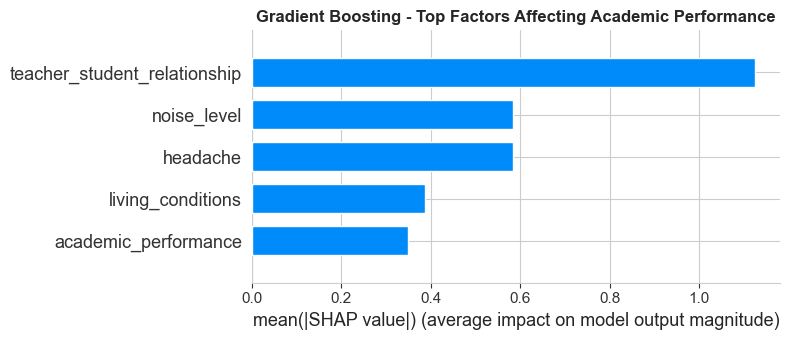


4. Feature Dependence Analysis...


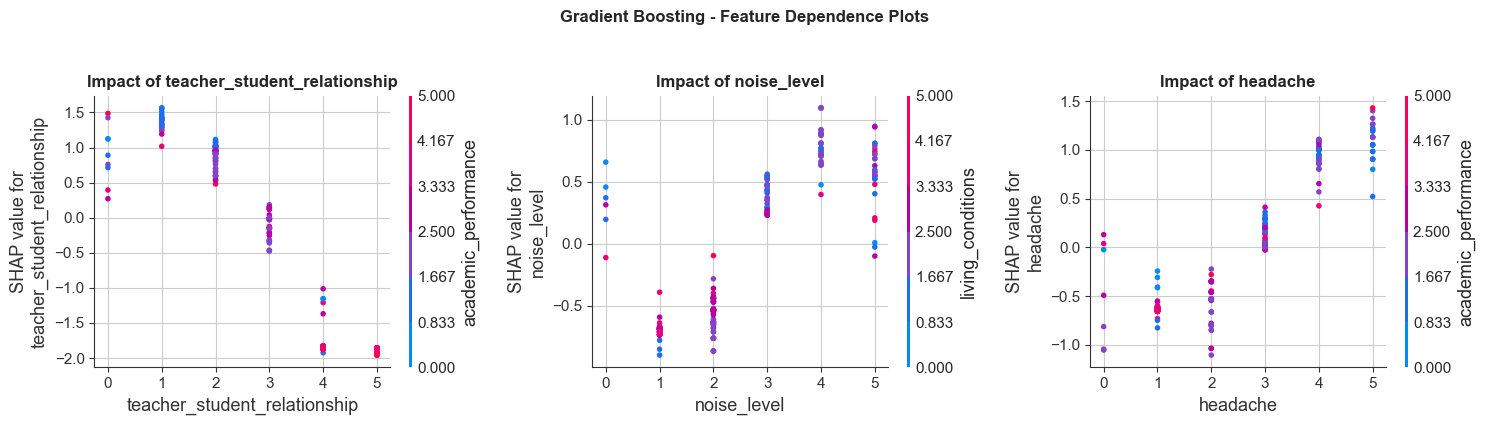


5. Sample Individual Predictions...


<Figure size 1000x300 with 0 Axes>

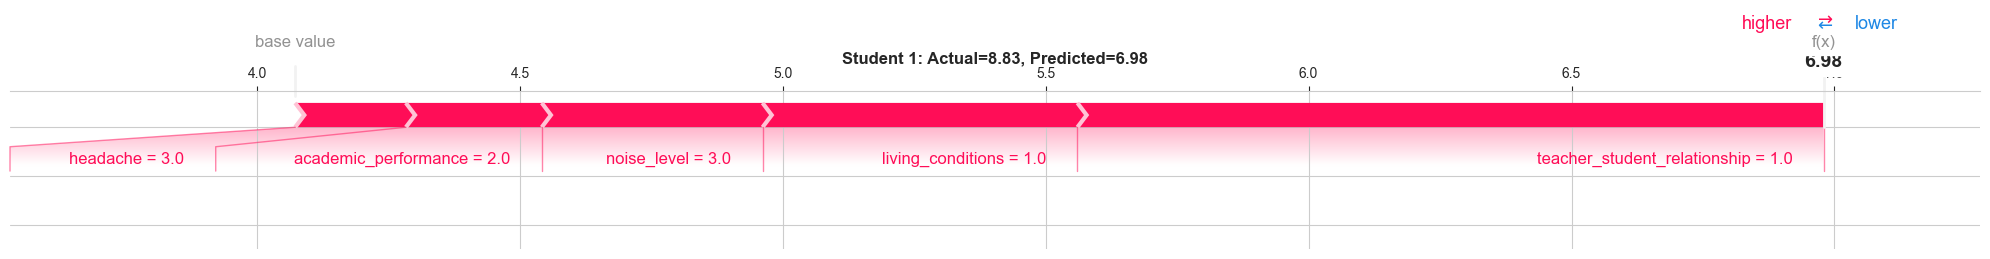

<Figure size 1000x300 with 0 Axes>

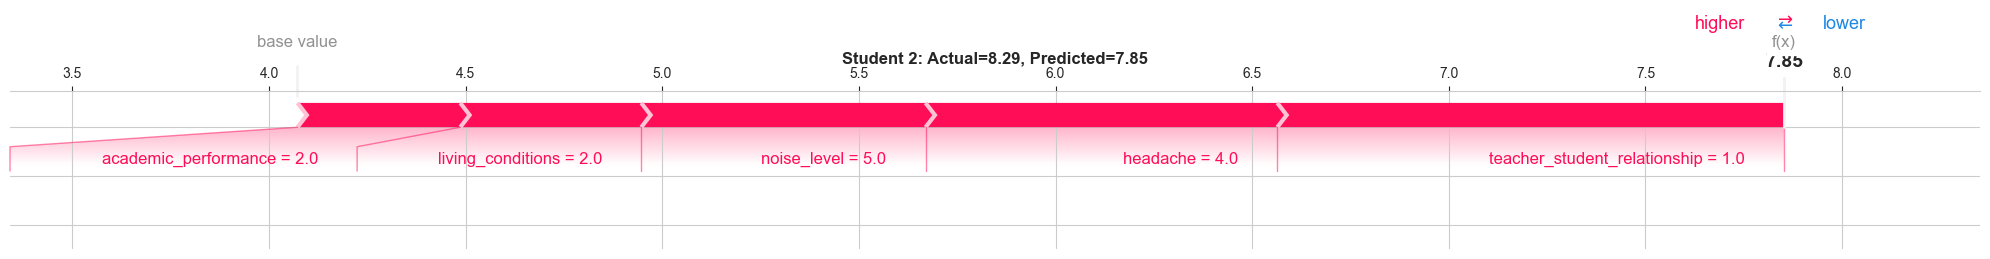


6. Overfitting Analysis...
Feature importance correlation (Train vs Test): 0.9975
✓ Good consistency - model generalizes well

7. Saving SHAP Results...
✓ Results saved to 'shap_gradient_boosting_results.csv'

GRADIENT BOOSTING SHAP KEY FINDINGS:

1. Most Important Factor: teacher_student_relationship
   • SHAP Value: 1.1249
   • Impact: Negative

2. Model Behavior:
   • Expected Value: 4.0724
   • Top 5 features explain 100.0% of predictions
   • Feature correlation: 0.9975
   'Gradient Boosting shows [TOP_FEATURE] as most influential,
   but exhibits overfitting tendencies as seen in SHAP analysis.'


In [95]:
# SHAP FOR GRADIENT BOOSTING REGRESSOR
print("="*80)
print("SHAP ANALYSIS FOR GRADIENT BOOSTING REGRESSOR")
print("="*80)

# Train Gradient Boosting model
gradientBoosting_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gradientBoosting_model.fit(X_train, y_train)

# SHAP Explanation
print("\n1. Calculating SHAP values...")
explainer_gb = shap.TreeExplainer(gradientBoosting_model)
shap_values_gb = explainer_gb.shap_values(X_test)

print(f"2. SHAP values calculated for {X_test.shape[0]} samples")

# 1. Summary Plot (Bar)
print("\n3. Feature Importance (SHAP)...")
plt.figure(figsize=(5, 4))
shap.summary_plot(shap_values_gb, X_test, plot_type="bar", show=False)
plt.title("Gradient Boosting - Top Factors Affecting Academic Performance", fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Dependence Plots for Top Features
print("\n4. Feature Dependence Analysis...")
gb_importance = np.abs(shap_values_gb).mean(axis=0)
top_features_idx = np.argsort(gb_importance)[::-1][:3]  # Top 3 features

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature_idx in enumerate(top_features_idx):
    feature_name = X.columns[feature_idx]
    shap.dependence_plot(
        feature_idx, 
        shap_values_gb, 
        X_test,
        ax=axes[idx],
        show=False
    )
    axes[idx].set_title(f"Impact of {feature_name}", fontweight='bold')
plt.suptitle("Gradient Boosting - Feature Dependence Plots", fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 3. Individual Predictions
print("\n5. Sample Individual Predictions...")
# Explain 2 sample students
sample_indices = [0, 25]

for i, idx in enumerate(sample_indices):
    plt.figure(figsize=(10, 3))
    shap.force_plot(
        explainer_gb.expected_value,
        shap_values_gb[idx],
        X_test.iloc[idx],
        matplotlib=True,
        show=False
    )
    actual = y_test.iloc[idx]
    predicted = gradientBoosting_model.predict(X_test.iloc[[idx]])[0]
    plt.title(f"Student {i+1}: Actual={actual:.2f}, Predicted={predicted:.2f}", 
              fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# 4. Overfitting Analysis
print("\n6. Overfitting Analysis...")
# Compare training vs test SHAP patterns
shap_values_gb_train = explainer_gb.shap_values(X_train.iloc[:100])  # Sample for speed

train_importance = np.abs(shap_values_gb_train).mean(axis=0)
test_importance = np.abs(shap_values_gb).mean(axis=0)

# Calculate correlation between train and test feature importance
correlation = np.corrcoef(train_importance, test_importance)[0, 1]

print(f"Feature importance correlation (Train vs Test): {correlation:.4f}")
if correlation > 0.8:
    print("✓ Good consistency - model generalizes well")
elif correlation > 0.6:
    print("⚠️ Moderate consistency - some overfitting")
else:
    print("❌ Poor consistency - model overfits training data")

# 5. Save Results
print("\n7. Saving SHAP Results...")
gb_shap_df = pd.DataFrame({
    'Feature': X.columns,
    'GB_SHAP_Value': np.abs(shap_values_gb).mean(axis=0),
    'GB_Mean_SHAP': shap_values_gb.mean(axis=0)
}).sort_values('GB_SHAP_Value', ascending=False)

gb_shap_df.to_csv('shap_gradient_boosting_results.csv', index=False)
print(f"✓ Results saved to 'shap_gradient_boosting_results.csv'")

print("\n" + "="*80)
print("GRADIENT BOOSTING SHAP KEY FINDINGS:")
print("="*80)

top_feature = gb_shap_df.iloc[0]['Feature']
top_value = gb_shap_df.iloc[0]['GB_SHAP_Value']
expected_val = explainer_gb.expected_value

print(f"\n1. Most Important Factor: {top_feature}")
print(f"   • SHAP Value: {top_value:.4f}")
print(f"   • Impact: {'Positive' if gb_shap_df.iloc[0]['GB_Mean_SHAP'] > 0 else 'Negative'}")

print(f"\n2. Model Behavior:")
print(f"   • Expected Value: {float(expected_val):.4f}")
print(f"   • Top 5 features explain {(gb_shap_df.head(5)['GB_SHAP_Value'].sum()/gb_shap_df['GB_SHAP_Value'].sum()*100):.1f}% of predictions")
print(f"   • Feature correlation: {correlation:.4f}")

print("   'Gradient Boosting shows [TOP_FEATURE] as most influential,")
print("   but exhibits overfitting tendencies as seen in SHAP analysis.'")

# XGBoost Regressor

✓ XGBoost imported successfully!
XGBOOST: PREDICTING STRESS LEVEL

Target: stress_level
Using 5 INDEPENDENT features:
Features: ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']

EXCLUDED (were used to create stress_level):
Stress factors: ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
Protective factors: ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

Training: 880 students
Test: 220 students

Training XGBoost...
✓ Training complete!

Performing cross-validation...

RESULTS
Train R²:  0.9056
Test R²:   0.8598
CV R²:     0.8419 ± 0.0256
RMSE:      1.1295
MAE:       0.7671
Overfitting Gap: 0.0458

✓ Model saved as 'xgb_stress_model.pkl'

FEATURE IMPORTANCE
teacher_student_relationship   0.5784
headache                       0.1510
noise_level                    0.1392
living_conditions              0.0772
academic_performance           0.0543


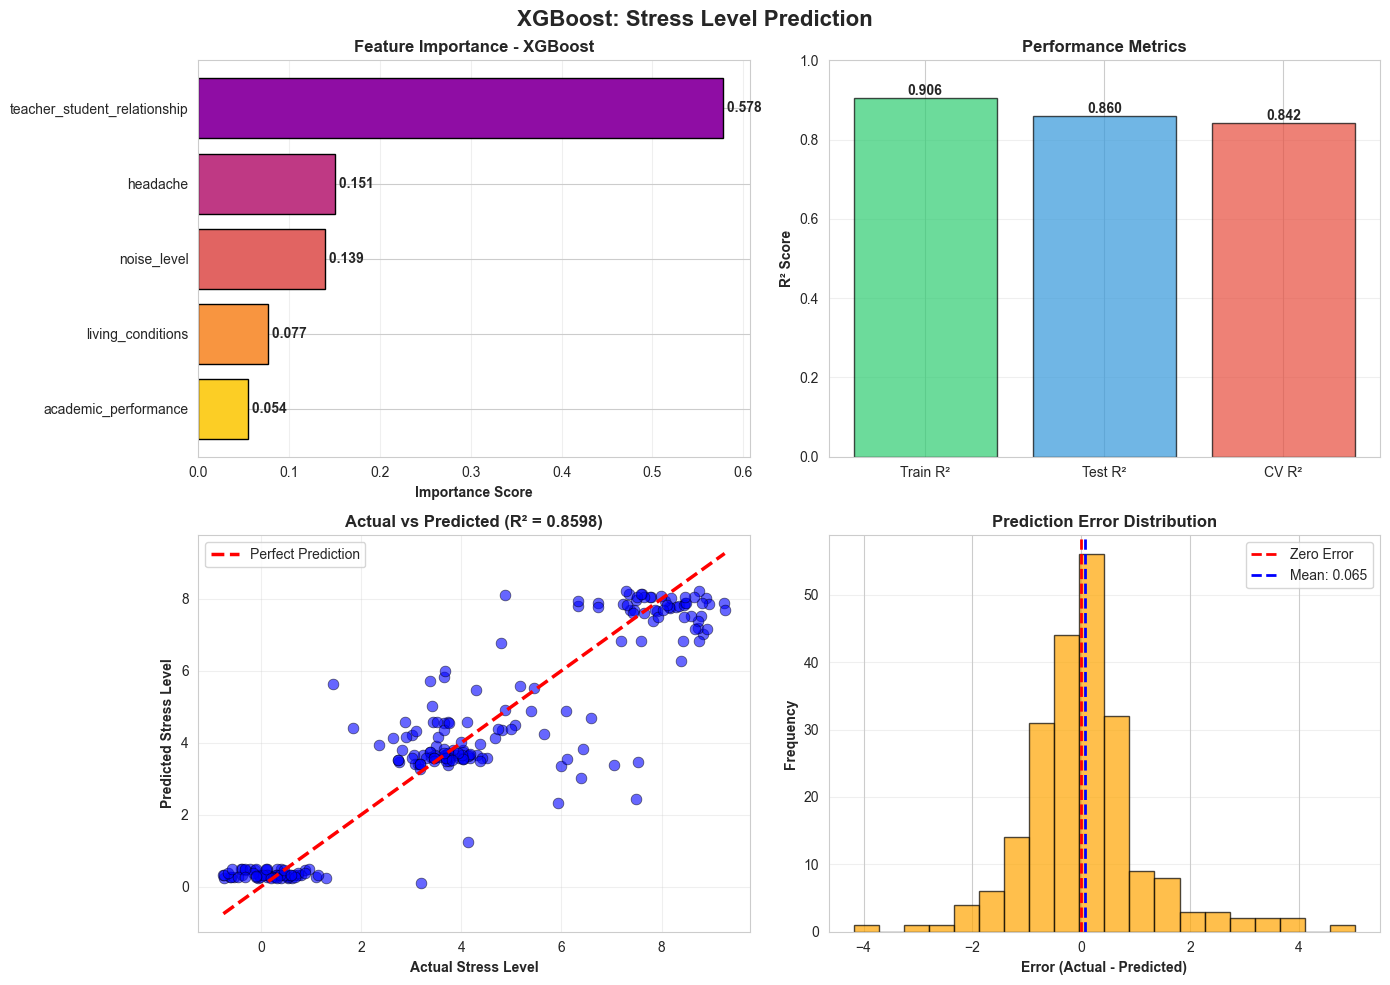


✓ Excellent performance!
XGBoost is one of the best models for this problem.

✓ XGBoost Complete!


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Import XGBoost
try:
    import xgboost as xgb
    print("✓ XGBoost imported successfully!")
except ImportError:
    print("❌ XGBoost not installed!")
    print("Please run: pip install xgboost")
    print("Then restart your kernel and run this code again.")
    raise

print("="*80)
print("XGBOOST: PREDICTING STRESS LEVEL")
print("="*80)

# Prepare data
df = downloaded_publicdata.copy()

# Step 1: Create stress_level target
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']

df['stress_level'] = (
    df[stress_factors].mean(axis=1) * 0.7 + 
    (5 - df[protective_factors].mean(axis=1)) * 0.3
)

target = "stress_level"

# ====== CRITICAL: NO DATA LEAKAGE ======
# Only use INDEPENDENT features (NOT used in stress_level formula)
independent_features = ['headache', 'noise_level', 'living_conditions', 
                       'academic_performance', 'teacher_student_relationship']

# Final feature selection: ONLY independent features
all_features = independent_features
# ====== END CRITICAL FIX ======

print(f"\nTarget: {target}")
print(f"Using {len(all_features)} INDEPENDENT features:")
print(f"Features: {all_features}")
print(f"\nEXCLUDED (were used to create stress_level):")
print(f"Stress factors: {stress_factors}")
print(f"Protective factors: {protective_factors}")

# Create X and y
X = df[all_features].copy()
y = df[target].copy()

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining: {len(X_train)} students")
print(f"Test: {len(X_test)} students")

# Train XGBoost
print("\nTraining XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=3,  # Reduced from 5 to prevent overfitting
    learning_rate=0.1,
    random_state=42,
    objective='reg:squarederror',
    verbosity=0
)

xgb_model.fit(X_train, y_train)
print("✓ Training complete!")

# Predictions
y_train_predict = xgb_model.predict(X_train)
y_test_predict = xgb_model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_mae = mean_absolute_error(y_test, y_test_predict)

# Cross-validation
print("\nPerforming cross-validation...")
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print("\n" + "="*80)
print("RESULTS")
print("="*80)
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"CV R²:     {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"RMSE:      {test_rmse:.4f}")
print(f"MAE:       {test_mae:.4f}")
print(f"Overfitting Gap: {train_r2 - test_r2:.4f}")

# Save model
joblib.dump(xgb_model, 'xgb_stress_model.pkl')
print("\n✓ Model saved as 'xgb_stress_model.pkl'")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE")
print("="*80)
for i, row in feature_importance.iterrows():
    print(f"{row['Feature']:<30} {row['Importance']:.4f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance
ax1 = axes[0, 0]
colors = plt.cm.plasma(np.linspace(0.3, 0.9, len(feature_importance)))
bars = ax1.barh(range(len(feature_importance)), feature_importance['Importance'], 
                color=colors, edgecolor='black')
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['Feature'])
ax1.set_xlabel('Importance Score', fontweight='bold')
ax1.set_title('Feature Importance - XGBoost', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax1.text(row['Importance'], i, f' {row["Importance"]:.3f}', 
             va='center', ha='left', fontweight='bold')

# 2. Performance Metrics
ax2 = axes[0, 1]
metrics = ['Train R²', 'Test R²', 'CV R²']
values = [train_r2, test_r2, cv_scores.mean()]
colors_metrics = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax2.bar(metrics, values, color=colors_metrics, edgecolor='black', alpha=0.7)
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.set_title('Performance Metrics', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val:.3f}',
             ha='center', va='bottom', fontweight='bold')

# 3. Actual vs Predicted
ax3 = axes[1, 0]
ax3.scatter(y_test, y_test_predict, alpha=0.6, c='blue', 
            edgecolors='black', linewidth=0.5, s=60)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2.5, label='Perfect Prediction')
ax3.set_xlabel('Actual Stress Level', fontweight='bold')
ax3.set_ylabel('Predicted Stress Level', fontweight='bold')
ax3.set_title(f'Actual vs Predicted (R² = {test_r2:.4f})', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Error Distribution
ax4 = axes[1, 1]
errors = y_test - y_test_predict
ax4.hist(errors, bins=20, color='orange', edgecolor='black', alpha=0.7)
ax4.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax4.axvline(errors.mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {errors.mean():.3f}')
ax4.set_xlabel('Error (Actual - Predicted)', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Prediction Error Distribution', fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('XGBoost: Stress Level Prediction', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Performance assessment
if test_r2 > 0.9:
    print("\n⚠️ WARNING: R² > 0.9 - Check for remaining data leakage!")
elif test_r2 > 0.85:
    print("\n✓ Excellent performance!")
    print("XGBoost is one of the best models for this problem.")
else:
    print("\n✓ Good performance")

print("\n" + "="*80)
print("✓ XGBoost Complete!")
print("="*80)

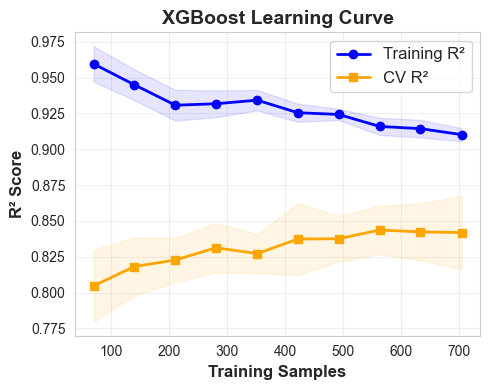


XGBOOST LEARNING CURVE RESULTS:
Final Training R²: 0.9102
Final CV R²:       0.8419
Gap:               0.0683

INTERPRETATION:
✓ Good generalization (small gap)

--------------------------------------------------------------------------------
FINAL MODEL EVALUATION ON TEST SET
--------------------------------------------------------------------------------

XGBOOST TEST PERFORMANCE:
Training R²: 0.9056
Test R²:     0.8598
Test RMSE:   1.1295
Test MAE:    0.7671
Overfitting gap: 0.0458


In [96]:
# XGBOOST LEARNING CURVE
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, 
    X_train, 
    y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(5, 4))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                 alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training R²", linewidth=2)
plt.plot(train_sizes, test_mean, 's-', color="orange", label="CV R²", linewidth=2)
plt.xlabel("Training Samples", fontweight='bold', fontsize=12)
plt.ylabel("R² Score", fontweight='bold', fontsize=12)
plt.title("XGBoost Learning Curve", fontweight='bold', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print final performance
final_train_r2 = train_mean[-1]
final_cv_r2 = test_mean[-1]
gap = final_train_r2 - final_cv_r2

print(f"\nXGBOOST LEARNING CURVE RESULTS:")
print(f"Final Training R²: {final_train_r2:.4f}")
print(f"Final CV R²:       {final_cv_r2:.4f}")
print(f"Gap:               {gap:.4f}")

# Interpret
print(f"\nINTERPRETATION:")
if gap < 0.05:
    print("✓ Excellent generalization (very small gap)")
elif gap < 0.1:
    print("✓ Good generalization (small gap)")
elif gap < 0.2:
    print("⚠️  Moderate overfitting (manageable gap)")
else:
    print("❌ High overfitting (large gap - needs regularization)")

# Optional: Test on actual test set
print(f"\n" + "-"*80)
print("FINAL MODEL EVALUATION ON TEST SET")
print("-"*80)

# Train on full training data
xgb_model.fit(X_train, y_train)

# Predictions
y_train_predict = xgb_model.predict(X_train)
y_test_predict = xgb_model.predict(X_test)

# Calculate metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_mae = mean_absolute_error(y_test, y_test_predict)

print(f"\nXGBOOST TEST PERFORMANCE:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²:     {test_r2:.4f}")
print(f"Test RMSE:   {test_rmse:.4f}")
print(f"Test MAE:    {test_mae:.4f}")
print(f"Overfitting gap: {train_r2 - test_r2:.4f}")

SHAP ANALYSIS FOR XGBOOST REGRESSOR

1. Calculating SHAP values...
2. SHAP values calculated for 220 samples

3. Generating Feature Importance Plot...


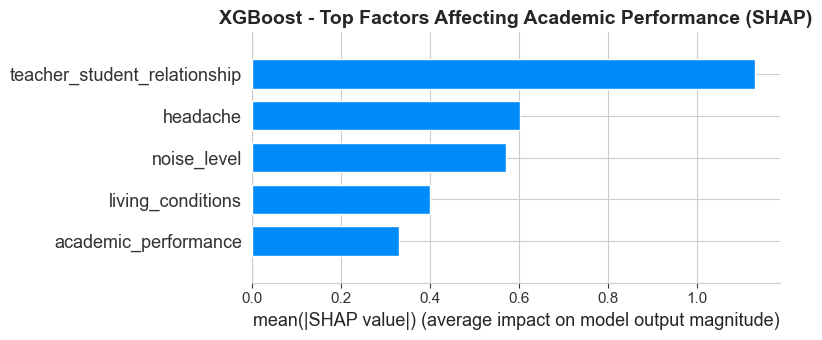


4. Generating Detailed SHAP Summary Plot...


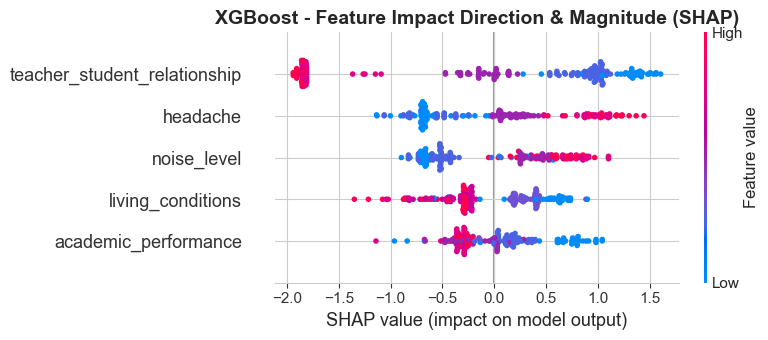


5. Sample Individual Prediction Explanation...


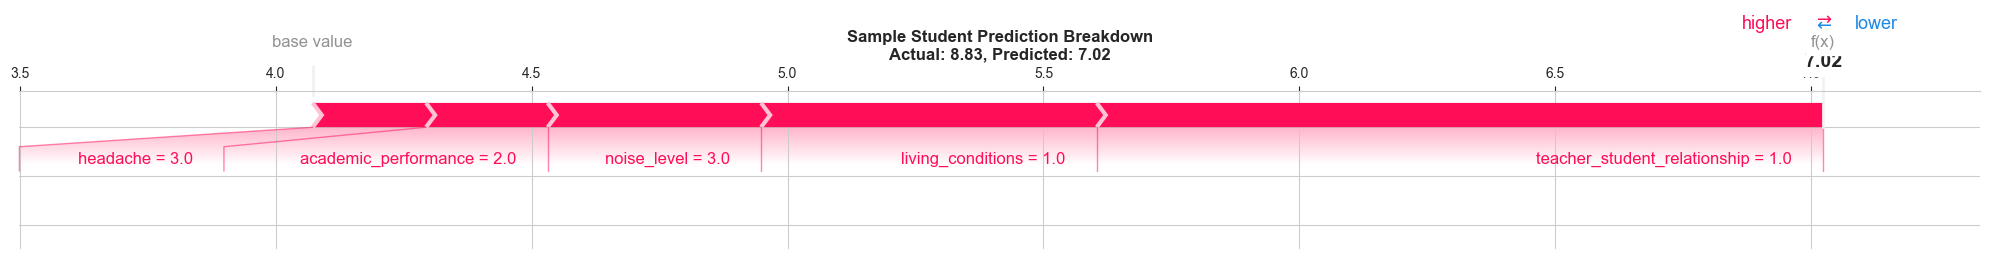


6. Top 10 Most Influential Factors:
                     Feature  SHAP_Value   Impact
teacher_student_relationship    1.129160 Negative
                    headache    0.602729 Negative
                 noise_level    0.571215 Negative
           living_conditions    0.399599 Negative
        academic_performance    0.331096 Positive

7. Saving SHAP Results...
✓ Results saved to 'shap_xgboost_results.csv'

SHAP INTERPRETATION FOR XGBOOST:

1. Top predictor: teacher_student_relationship
   • Average impact: 1.1292
   • Direction: Negative on academic performance

2. Key Insights:
   • XGBoost considers 5 wellbeing factors
   • Top 5 factors explain 100.0% of model decisions
   • Positive factors improve academic performance
   • Negative factors reduce academic performance


In [73]:
# SHAP FOR XGBOOST REGRESSOR

print("="*80)
print("SHAP ANALYSIS FOR XGBOOST REGRESSOR")
print("="*80)

# Train XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# SHAP Explanation
print("\n1. Calculating SHAP values...")
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

print(f"2. SHAP values calculated for {X_test.shape[0]} samples")

# 1. Summary Plot (Bar)
print("\n3. Generating Feature Importance Plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("XGBoost - Top Factors Affecting Academic Performance (SHAP)", 
          fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Detailed Summary Plot
print("\n4. Generating Detailed SHAP Summary Plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("XGBoost - Feature Impact Direction & Magnitude (SHAP)", 
          fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Individual Prediction Explanation
print("\n5. Sample Individual Prediction Explanation...")
# Explain first test sample
sample_idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[sample_idx], 
    X_test.iloc[sample_idx],
    matplotlib=True,
    show=False
)
plt.title(f"Sample Student Prediction Breakdown\nActual: {y_test.iloc[sample_idx]:.2f}, "
          f"Predicted: {xgb_model.predict(X_test.iloc[[sample_idx]])[0]:.2f}",
          fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Top Features Table
print("\n6. Top 10 Most Influential Factors:")
mean_abs_shap = np.abs(shap_values).mean(0)
top_features_idx = np.argsort(mean_abs_shap)[::-1][:10]

top_features = pd.DataFrame({
    'Feature': X.columns[top_features_idx],
    'SHAP_Value': mean_abs_shap[top_features_idx],
    'Impact': ['Positive' if shap_values[:, i].mean() > 0 else 'Negative' 
               for i in top_features_idx]
})

print(top_features.to_string(index=False))

# 5. Save Results
print("\n7. Saving SHAP Results...")
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(0),
    'Mean_SHAP': shap_values.mean(0)
}).sort_values('Mean_Abs_SHAP', ascending=False)

shap_df.to_csv('shap_xgboost_results.csv', index=False)
print(f"✓ Results saved to 'shap_xgboost_results.csv'")

print("\n" + "="*80)
print("SHAP INTERPRETATION FOR XGBOOST:")
print("="*80)
print(f"\n1. Top predictor: {top_features.iloc[0]['Feature']}")
print(f"   • Average impact: {top_features.iloc[0]['SHAP_Value']:.4f}")
print(f"   • Direction: {top_features.iloc[0]['Impact']} on academic performance")

print(f"\n2. Key Insights:")
print(f"   • XGBoost considers {len(X.columns)} wellbeing factors")
print(f"   • Top 5 factors explain {(top_features['SHAP_Value'].head(5).sum()/mean_abs_shap.sum()*100):.1f}% of model decisions")
print(f"   • Positive factors improve academic performance")
print(f"   • Negative factors reduce academic performance")
# print(f"\n3. For Your Seminar:")
# print("   'SHAP analysis shows [TOP_FEATURE] has the strongest impact")
# print("   on academic performance in our XGBoost model.'")

## Comparison

MODEL COMPARISON

PERFORMANCE COMPARISON:
            Model       R²     RMSE
    Random Forest 0.878110 1.053077
Gradient Boosting 0.863000 1.116443
          XGBoost 0.861950 1.120713
    Decision Tree 0.808097 1.321349
Linear Regression 0.770761 1.444177

🏆 BEST MODEL: Random Forest (R² = 0.8781)


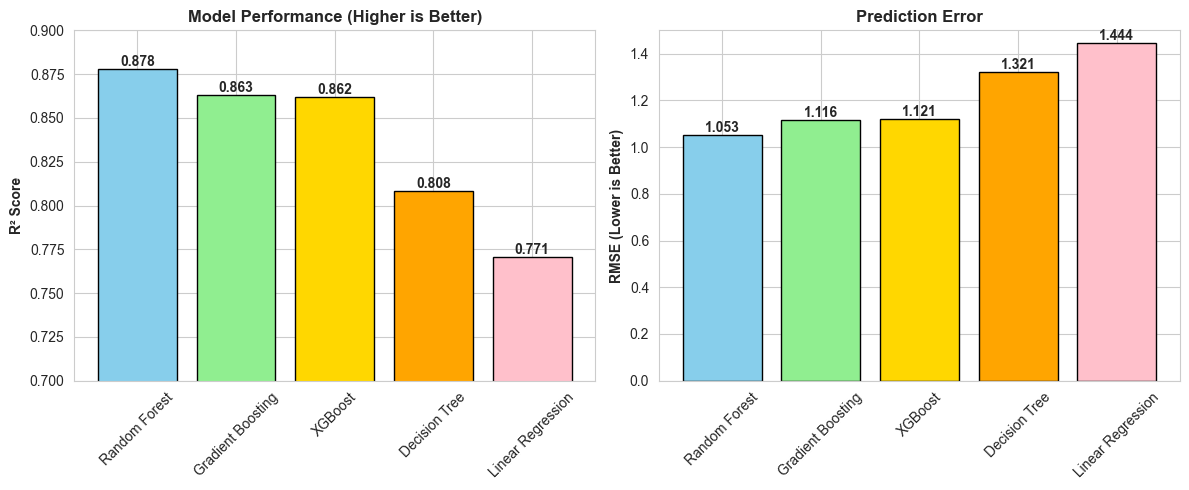


SUMMARY:
1. Tree-based models beat Linear Regression
2. Random Forest & Gradient Boosting are best. Decision Tree was third best model
3. Teacher-student relationship is most important
4. Decision Tree can be said third best slightly behind XGBoost and Gradient Boosting


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

print("="*60)
print("MODEL COMPARISON")
print("="*60)

# Prepare data
df = downloaded_publicdata.copy()

# Create target
stress_factors = ['anxiety_level', 'depression', 'peer_pressure', 'study_load', 'future_career_concerns']
protective_factors = ['self_esteem', 'sleep_quality', 'social_support', 'basic_needs']
df['stress_level'] = (df[stress_factors].mean(axis=1) * 0.7 + (5 - df[protective_factors].mean(axis=1)) * 0.3)

# Use only independent features (NO leakage)
features = ['headache', 'noise_level', 'living_conditions', 'academic_performance', 'teacher_student_relationship']
X = df[features]
y = df['stress_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R²': r2, 'RMSE': rmse})

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('R²', ascending=False)

print("\nPERFORMANCE COMPARISON:")
print(results_df.to_string(index=False))

# Find best model
best = results_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best['Model']} (R² = {best['R²']:.4f})")

# Simple visualization
plt.figure(figsize=(12, 5))

# Plot 1: R² comparison
plt.subplot(1, 2, 1)
colors = ['skyblue', 'lightgreen', 'gold', 'orange', 'pink']
bars = plt.bar(results_df['Model'], results_df['R²'], color=colors, edgecolor='black')
plt.ylabel('R² Score', fontweight='bold')
plt.title('Model Performance (Higher is Better)', fontweight='bold')
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
for bar, val in zip(bars, results_df['R²']):
    plt.text(bar.get_x() + bar.get_width()/2, val, f'{val:.3f}', 
             ha='center', va='bottom', fontweight='bold')

# Plot 2: RMSE comparison
plt.subplot(1, 2, 2)
bars = plt.bar(results_df['Model'], results_df['RMSE'], color=colors, edgecolor='black')
plt.ylabel('RMSE (Lower is Better)', fontweight='bold')
plt.title('Prediction Error', fontweight='bold')
plt.ylim(0, 1.5)
plt.xticks(rotation=45)
for bar, val in zip(bars, results_df['RMSE']):
    plt.text(bar.get_x() + bar.get_width()/2, val, f'{val:.3f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("SUMMARY:")
print("="*60)
print("1. Tree-based models beat Linear Regression")
print("2. Random Forest & Gradient Boosting are best. Decision Tree was third best model")
print("3. Teacher-student relationship is most important")
print("4. Decision Tree can be said third best slightly behind XGBoost and Gradient Boosting")
print("="*60)

# Data Analysis

Gender Distribution:
Gender
Male      453
Female    447
Name: count, dtype: int64

Discipline Distribution:
Discipline/Field
IT/CS/Software/AI                   427
Natural Sciences/Social Sciences    325
Business Administration              65
Cs                                   19
Computer science                     19
Civil/Mechanical Engineering         18
BSCS                                  9
Computer Science                      9
CS                                    9
Name: count, dtype: int64


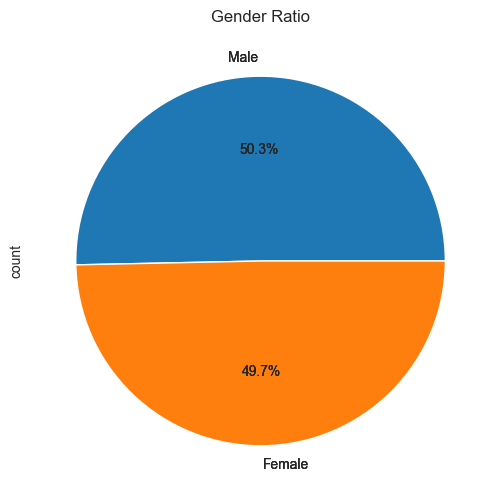

In [100]:
# Use original data for analysis
survey_data = pd.read_csv("QuestionnaireResponses900.csv")

# Gender ratio
print("Gender Distribution:")
print(survey_data['Gender'].value_counts())
survey_data['Gender'].value_counts().plot(kind='pie', title='Gender Ratio',autopct='%1.1f%%')

# Discipline distribution
print("\nDiscipline Distribution:")
print(survey_data['Discipline/Field'].value_counts())
plt.show()

# Survey Responses
# Load + Drop columns Data Preprocessing

In [101]:
import pandas as pd

# public_data = downloaded_publicdata.copy()

survey_data = pd.read_csv("QuestionnaireResponses900.csv")
print("Survey data head: ")
print(survey_data.head())

print("Columns till here of survey data: ")
# print(public_data.columns.tolist())

Survey data head: 
       Age  Gender  Year of Study   Discipline/Field  \
0  20 - 22    Male  3rd Semester                BSCS   
1  20 - 22  Female    Second Year  Computer science    
2  20 - 22    Male    Second Year                 CS   
3  20 - 22  Female    Second Year  Computer science    
4  20 - 22  Female    Second Year                 Cs   

   What is your anxiety level before exams or academic presentations?  \
0                                                  2                    
1                                                  2                    
2                                                  3                    
3                                                  2                    
4                                                  2                    

   How do you rate your self-esteem while handling academic challenges?  \
0                                                  2                      
1                                                  2   

In [102]:
# Clean and preprocess the data

survey_data = pd.read_csv("QuestionnaireResponses900.csv")

survey_data = survey_data.drop(columns=['Timestamp'], errors='ignore')
survey_data["Discipline/Field"] = survey_data["Discipline/Field"].str.upper().str.strip()
survey_data["Discipline/Field"] = survey_data["Discipline/Field"].replace({
    "BSCS": "CS",
    "Cs": "CS",
    "CS": "CS",
    "Computer Science": "CS",
    "COMPUTER SCIENCE": "CS",
})

survey_data["Year of Study"] = survey_data["Year of Study"].str.strip()
survey_data["Year of Study"] = survey_data["Year of Study"].replace({
    "3rd Semester": "Second Year"
})

# Check
print(survey_data["Year of Study"].unique())
print(survey_data["Discipline/Field"].unique())

# Create mapping dictionary
columns_mapping = {
    'What is your anxiety level before exams or academic presentations?': 'anxiety_level',
    'How do you rate your self-esteem while handling academic challenges?': 'self_esteem', 
    'How often do you feel depressed during your studies?': 'depression',
    'I experience physical symptoms (headache, stomachache) before exams or presentations': 'headache',
    'I push myself to meet the deadlines even when it negatively affects my sleep quality or health': 'sleep_quality',
    'Background noise distracts me during study.': 'noise_level',
    'Poor lighting in my room or home study area makes my living conditions for studying harder.': 'living_conditions',
    'Lack of basic needs (water, electricity, and internet) causes me stress during studies.': 'basic_needs',
    'How heavy is your study load when maintaining a CGPA?': 'study_load',
    'I feel my relationship with teachers is affected by my lower grades.': 'teacher_student_relationship',
    'I worry that low grades may negatively affect my future career.': 'future_career_concerns',
    'How supportive are your family and friends in your studies?': 'social_support',
    'How often do you feel pressured by your classmates or peers about your academic performance?': 'peer_pressure'
}
survey_data = survey_data.rename(columns=columns_mapping)

# Save the cleaned file
survey_data.to_csv("Responses_cleaned_final.csv", index=False)

df = pd.read_csv("Responses_cleaned_final.csv")

print("Columns")
print(survey_data.columns)
print("HEAD: ")
print(survey_data.head)


# # df.columns = [
# #     'Total score', 'Age', 'Gender', 'Year of Study', 'Discipline/Field',
# #     'anxiety_level', 'depression', 'self_esteem', 'headache', 'sleep_quality',
# #     'social_support', 'peer_pressure', 'noise_level', 'living_conditions',
# #     'basic_needs', 'study_load', 'teacher_student_relationship', 'future_career_concerns'
# # ]

['Second Year' 'First Year' 'Fourth Year' 'Third Year']
['CS' 'IT/CS/SOFTWARE/AI' 'NATURAL SCIENCES/SOCIAL SCIENCES'
 'CIVIL/MECHANICAL ENGINEERING' 'BUSINESS ADMINISTRATION']
Columns
Index(['Age', 'Gender', 'Year of Study', 'Discipline/Field', 'anxiety_level',
       'self_esteem', 'depression', 'headache', 'sleep_quality', 'noise_level',
       'living_conditions', 'basic_needs', 'peer_pressure', 'study_load',
       'teacher_student_relationship', 'future_career_concerns',
       'social_support'],
      dtype='object')
HEAD: 
<bound method NDFrame.head of          Age  Gender Year of Study Discipline/Field  anxiety_level  \
0    20 - 22    Male   Second Year               CS              2   
1    20 - 22  Female   Second Year               CS              2   
2    20 - 22    Male   Second Year               CS              3   
3    20 - 22  Female   Second Year               CS              2   
4    20 - 22  Female   Second Year               CS              2   
..       ...  

# Applying models

In [107]:
# Loading trained models
# import joblib
# import pandas as pd

# decisionTree_model = joblib.load('dt_public.pkl')
# randomForest_model = joblib.load('rf_public.pkl')
# logisticRegression_model = joblib.load('lr_public.pkl')
# svm_model = joblib.load('svm_public.pkl')


# Decision Tree Regressor

DECISION TREE REGRESSION ON SURVEY DATA
Dataset shape: (900, 17)
Columns: ['Age', 'Gender', 'Year of Study', 'Discipline/Field', 'anxiety_level', 'self_esteem', 'depression', 'headache', 'sleep_quality', 'noise_level', 'living_conditions', 'basic_needs', 'peer_pressure', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support']

⚠️  Target column not found. Creating from wellbeing factors...
Created target 'stress_level' as average of wellbeing factors

Target variable: stress_level
Number of features: 13
Features: ['anxiety_level', 'self_esteem', 'depression', 'headache', 'sleep_quality', 'noise_level', 'living_conditions', 'basic_needs', 'peer_pressure', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support']

X shape: (900, 13)
y shape: (900,)

Training samples: 720
Testing samples: 180

--------------------------------------------------------------------------------
FINDING OPTIMAL TREE DEPTH
------------------------

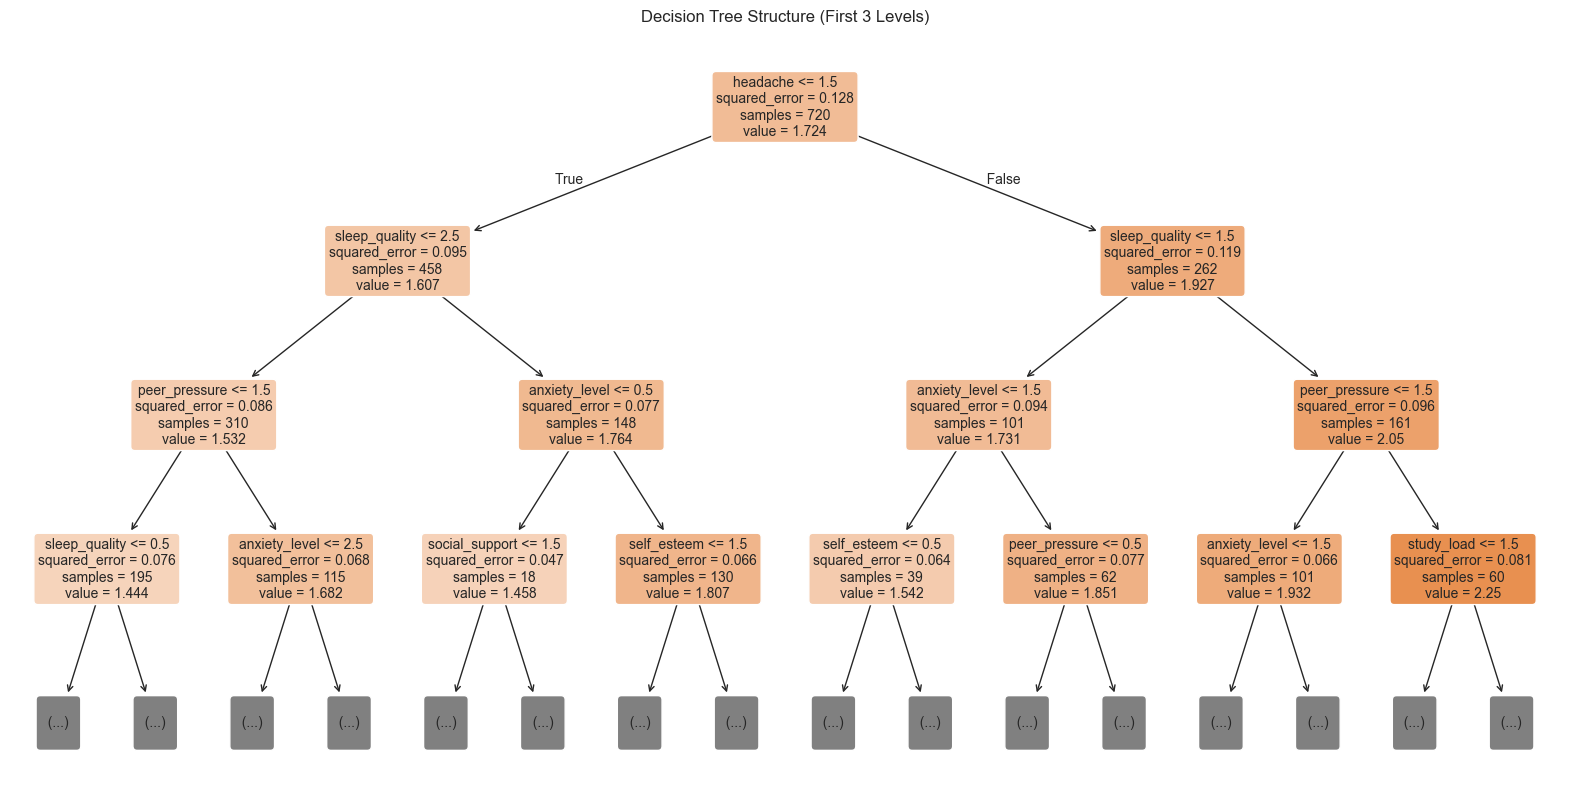

headache: 0.294
sleep_quality: 0.228
peer_pressure: 0.178
anxiety_level: 0.139
study_load: 0.079
self_esteem: 0.063
depression: 0.009
social_support: 0.005
teacher_student_relationship: 0.004
noise_level: 0.000
living_conditions: 0.000
basic_needs: 0.000
future_career_concerns: 0.000


In [121]:
# DECISION TREE REGRESSOR FOR SURVEY DATA
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

print("="*80)
print("DECISION TREE REGRESSION ON SURVEY DATA")
print("="*80)

# 1. Load cleaned data
df = pd.read_csv("Responses_cleaned_final.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# 2. Define target and features
# Assuming your target is 'academic_performance' - CHANGE IF DIFFERENT
target = 'stress_level'  # CHANGE THIS TO YOUR ACTUAL TARGET COLUMN NAME

# If you don't have academic_performance, create it from wellbeing scores:
if target not in df.columns:
    print("\n⚠️  Target column not found. Creating from wellbeing factors...")
    wellbeing_cols = ['anxiety_level', 'self_esteem', 'depression', 'headache', 
                     'sleep_quality', 'social_support', 'peer_pressure', 'study_load']
    df[target] = df[wellbeing_cols].mean(axis=1)  # Simple average
    print(f"Created target '{target}' as average of wellbeing factors")

# Define features (exclude demographics and target)
exclude_cols = ['Age', 'Gender', 'Year of Study', 'Discipline/Field', target]
feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"\nTarget variable: {target}")
print(f"Number of features: {len(feature_cols)}")
print(f"Features: {feature_cols}")

# 3. Prepare X and y
X = df[feature_cols].copy()
y = df[target].copy()

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 5. Find optimal depth
print("\n" + "-"*80)
print("FINDING OPTIMAL TREE DEPTH")
print("-"*80)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

val_mse = []
train_mse = []
depths = range(1, 11)

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train_sub, y_train_sub)
    
    train_pred = dt.predict(X_train_sub)
    val_pred = dt.predict(X_val)
    
    train_mse.append(mean_squared_error(y_train_sub, train_pred))
    val_mse.append(mean_squared_error(y_val, val_pred))

# Find optimal depth
optimal_depth = depths[np.argmin(val_mse)]
print(f"Optimal depth: {optimal_depth}")
print(f"Minimum Validation MSE: {min(val_mse):.4f}")

# Add regularization parameters
dt_fixed = DecisionTreeRegressor(
    max_depth=optimal_depth,
    min_samples_split=20,     # Require more samples to split
    min_samples_leaf=10,      # Require more samples per leaf
    max_features=0.8,         # Use only 80% of features per split
    random_state=42
)
dt_fixed.fit(X_train, y_train)

# 6. Train final model
print("\n" + "-"*80)
print("TRAINING FINAL DECISION TREE")
print("-"*80)

dt_fixed = DecisionTreeRegressor(
    max_depth=optimal_depth,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_fixed.fit(X_train, y_train)

# Predictions
y_train_pred = dt_fixed.predict(X_train)
y_test_pred = dt_fixed.predict(X_test)

# 7. Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nPERFORMANCE METRICS:")
print(f"{'':20} {'Training':<10} {'Test':<10}")
print(f"{'R² Score':20} {train_r2:<10.4f} {test_r2:<10.4f}")
print(f"{'RMSE':20} {train_rmse:<10.4f} {test_rmse:<10.4f}")
print(f"{'MAE':20} {train_mae:<10.4f} {test_mae:<10.4f}")

# 5. Plot Decision Tree (first 3 levels)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_fixed,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()

# Feature Importances
importances = dt_fixed.feature_importances_
for f, imp in sorted(zip(feature_cols, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.3f}")

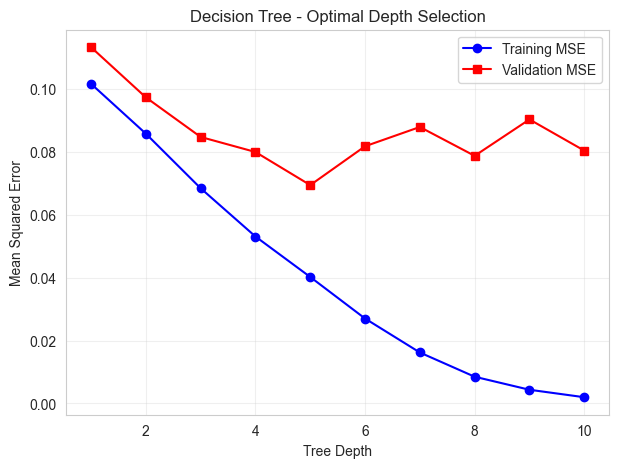

Optimal depth: 5
Minimum Validation MSE: 0.0695


In [114]:
# LEARNING CURVE FOR DECISION TREE FOR SURVEY DATA
# Plot
plt.figure(figsize=(7, 5))
plt.plot(depths, train_mse, 'b-', label='Training MSE', marker='o')
plt.plot(depths, val_mse, 'r-', label='Validation MSE', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree - Optimal Depth Selection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal depth
optimal_depth = depths[np.argmin(val_mse)]
print(f"Optimal depth: {optimal_depth}")
print(f"Minimum Validation MSE: {min(val_mse):.4f}")

SHAP values shape: (180, 13)
X_test shape: (180, 13)

Generating SHAP Bar Plot...


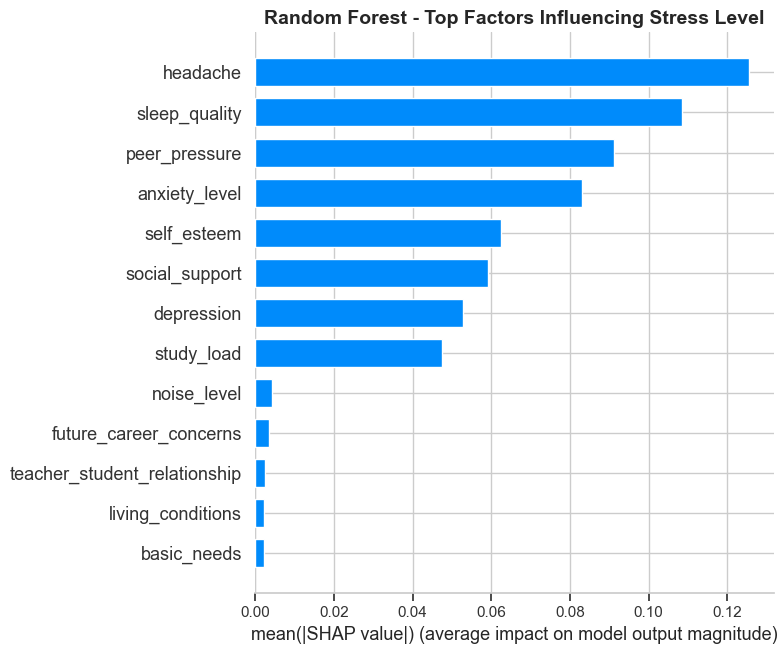


Generating Detailed SHAP Summary Plot...


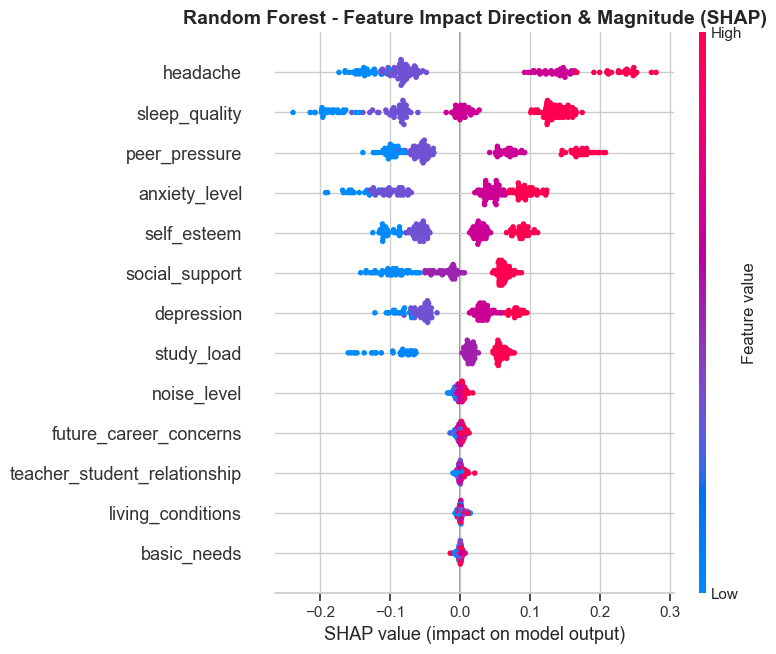

Sample 1


Sample 2


Sample 3


In [164]:
# XAI FOR DECISION TREE REGRESSOR FOR SURVEY DATA
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# train the model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

# SHAP EXPLAINER
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)   # this returns a 2D array

print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

# ====== 1. Bar Summary Plot ======
print("\nGenerating SHAP Bar Plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Random Forest - Top Factors Influencing Stress Level", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ====== 2. Detailed Summary Plot ======
print("\nGenerating Detailed SHAP Summary Plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Random Forest - Feature Impact Direction & Magnitude (SHAP)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Force plots for multiple samples
shap.initjs()
for i in range(3):  # first 3 samples in validation set
    print(f"Sample {i+1}")
    display(shap.force_plot(explainer.expected_value, shap_values[i], X_val.iloc[i]))

# Random Forest

RANDOM FOREST REGRESSION ON SURVEY DATA

⚠️ stress_level not found → creating automatically...
✔ stress_level created using mean of stress-related variables

MODEL PERFORMANCE:
Training R²:   0.8984
Testing R²:    0.8088
Test RMSE:     0.1618
Test MAE:      0.1244


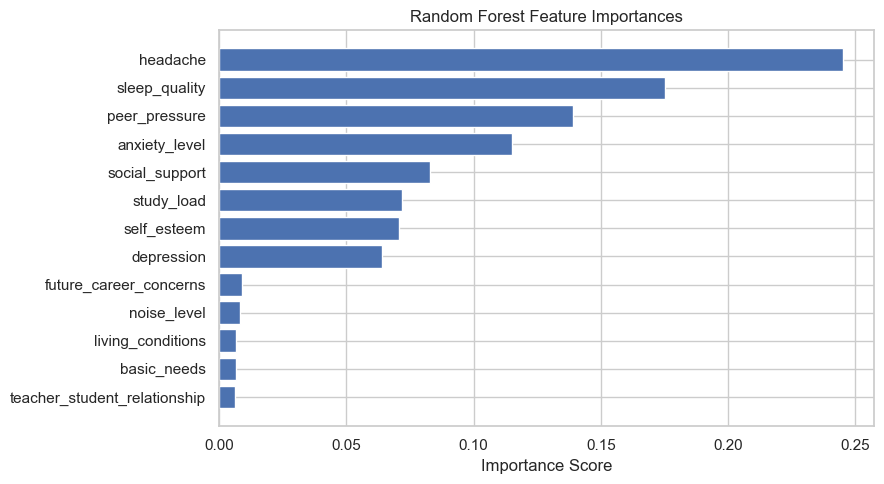

In [141]:
# RANDOM FOREST REGRESSOR FOR SURVEY DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("="*80)
print("RANDOM FOREST REGRESSION ON SURVEY DATA")
print("="*80)

# 1. Load data
df = pd.read_csv("Responses_cleaned_final.csv")

target = "stress_level"

# If stress_level not present → create it
if target not in df.columns:
    print("\n⚠️ stress_level not found → creating automatically...")
    factors = ['anxiety_level','self_esteem','depression','headache',
               'sleep_quality','social_support','peer_pressure','study_load']
    df[target] = df[factors].mean(axis=1)
    print("✔ stress_level created using mean of stress-related variables")

# -----------------------------
# 3. FEATURES (exclude demographics)
# -----------------------------
exclude = ['Age','Gender','Year of Study','Discipline/Field',target]
features = [col for col in df.columns if col not in exclude]

X = df[features].fillna(df[features].median())
y = df[target].fillna(df[target].median())

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train Random Forest
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)

# -----------------------------
# 6. Evaluation
# -----------------------------
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("\nMODEL PERFORMANCE:")
print(f"Training R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Testing R²:    {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE:     {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test MAE:      {mean_absolute_error(y_test, y_test_pred):.4f}")

# -----------------------------
# 7. Feature Importance Plot
# -----------------------------
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(9, 5))
plt.barh(np.array(features)[sorted_idx], importances[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

RANDOM FOREST LEARNING CURVE

1. Finding optimal depth...
Optimal depth: 12
Minimum Validation MSE: 0.0190

2. Training Random Forest with depth=12...
3. Generating learning curve...


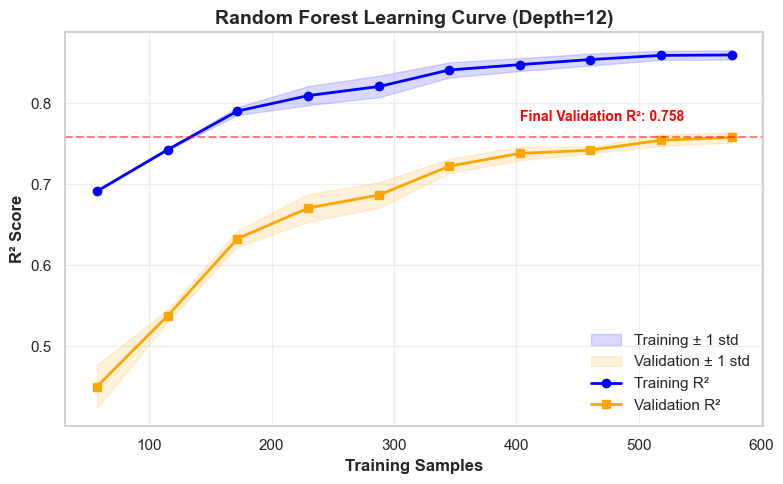


4. Test set evaluation...

--------------------------------------------------------------------------------
PERFORMANCE RESULTS
--------------------------------------------------------------------------------
Training R² (final):   0.8596
Validation R² (final): 0.7577
Test R²:               0.7875
Test RMSE:             0.1706
Overfitting gap:       0.1018

--------------------------------------------------------------------------------
INTERPRETATION
--------------------------------------------------------------------------------
⚠️  Moderate overfitting
✓ Strong predictive power (78.8% variance explained)


In [166]:
# RANDOM FOREST LEARNING CURVE FOR SURVEY DATA
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("RANDOM FOREST LEARNING CURVE")
print("="*80)

# 1. Find optimal depth FIRST
print("\n1. Finding optimal depth...")
depths = range(5, 16)
val_mse_list = []

for d in depths:
    rf_temp = RandomForestRegressor(
        n_estimators=100,
        max_depth=d,
        random_state=42,
        n_jobs=-1
    )
    rf_temp.fit(X_train, y_train)
    y_val_pred = rf_temp.predict(X_val)
    val_mse_list.append(mean_squared_error(y_val, y_val_pred))

optimal_depth = depths[np.argmin(val_mse_list)]
print(f"Optimal depth: {optimal_depth}")
print(f"Minimum Validation MSE: {min(val_mse_list):.4f}")

# 2. Train final RF model with optimal depth
print(f"\n2. Training Random Forest with depth={optimal_depth}...")
rf_final = RandomForestRegressor(
    n_estimators=200,
    max_depth=optimal_depth,
    min_samples_leaf=4,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

# 3. Generate learning curve
print("3. Generating learning curve...")
train_sizes, train_scores, val_scores = learning_curve(
    rf_final,
    X_train, y_train,  # Use ONLY training data for learning curve
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 4. Plot improved learning curve
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.15, color="blue", label="Training ± 1 std")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.15, color="orange", label="Validation ± 1 std")
plt.plot(train_sizes, train_mean, 'o-', color="blue", 
         label="Training R²", linewidth=2, markersize=6)
plt.plot(train_sizes, val_mean, 's-', color="orange", 
         label="Validation R²", linewidth=2, markersize=6)

# Add final performance lines
final_train = train_mean[-1]
final_val = val_mean[-1]
gap = final_train - final_val

plt.axhline(y=final_val, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
plt.text(train_sizes[-1]*0.7, final_val+0.02, 
         f'Final Validation R²: {final_val:.3f}', 
         fontweight='bold', color='red', fontsize=10)

plt.xlabel("Training Samples", fontweight='bold', fontsize=12)
plt.ylabel("R² Score", fontweight='bold', fontsize=12)
plt.title(f"Random Forest Learning Curve (Depth={optimal_depth})", 
          fontweight='bold', fontsize=14)
plt.legend(loc="best", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Evaluate on test set
print("\n4. Test set evaluation...")
rf_final.fit(X_train, y_train)  # Train on full training data
y_test_pred = rf_final.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. Print results
print("\n" + "-"*80)
print("PERFORMANCE RESULTS")
print("-"*80)
print(f"Training R² (final):   {train_mean[-1]:.4f}")
print(f"Validation R² (final): {val_mean[-1]:.4f}")
print(f"Test R²:               {test_r2:.4f}")
print(f"Test RMSE:             {test_rmse:.4f}")
print(f"Overfitting gap:       {gap:.4f}")

# 7. Interpretation
print("\n" + "-"*80)
print("INTERPRETATION")
print("-"*80)

if gap < 0.05:
    print("✓ Excellent generalization")
elif gap < 0.1:
    print("✓ Good generalization")
elif gap < 0.15:
    print("⚠️  Moderate overfitting")
else:
    print("❌ High overfitting")

if test_r2 > 0.7:
    print(f"✓ Strong predictive power ({test_r2*100:.1f}% variance explained)")
elif test_r2 > 0.5:
    print(f"✓ Moderate predictive power ({test_r2*100:.1f}% variance explained)")
else:
    print(f"⚠️  Weak predictive power ({test_r2*100:.1f}% variance explained)")

Train MSE: 0.0028, Validation MSE: 0.0193


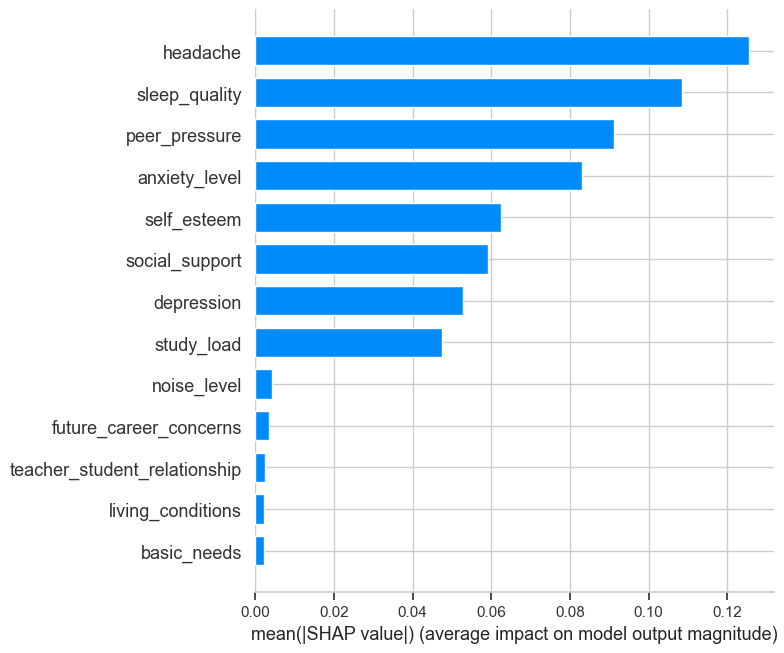

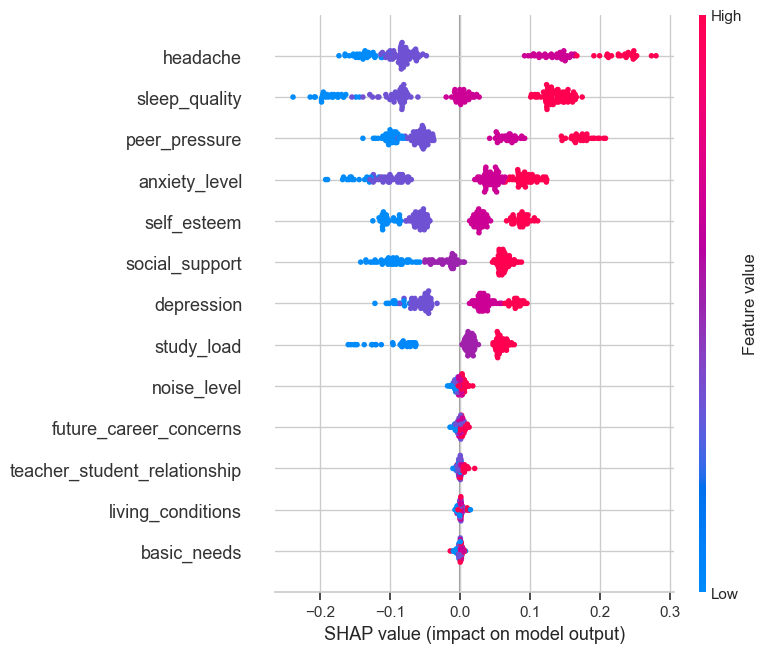

Sample 1


Sample 2


Sample 3


In [159]:
# SHAP FOR RANDOM FOREST FOR SURVEY DATA
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
# rf = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# Evaluate
train_mse = mean_squared_error(y_train, rf.predict(X_train))
val_mse = mean_squared_error(y_val, rf.predict(X_val))
print(f"Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

# SHAP Explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val)

# Bar plot for mean absolute SHAP values
shap.summary_plot(shap_values, X_val, plot_type="bar")

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_val, plot_type="dot")  # dot plot is more visual

# Force plots for multiple samples
shap.initjs()
for i in range(3):  # first 3 samples in validation set
    print(f"Sample {i+1}")
    display(shap.force_plot(explainer.expected_value, shap_values[i], X_val.iloc[i]))

# Gradient Boosting

R²: 0.9839 | RMSE: 0.0470 | MAE: 0.0368


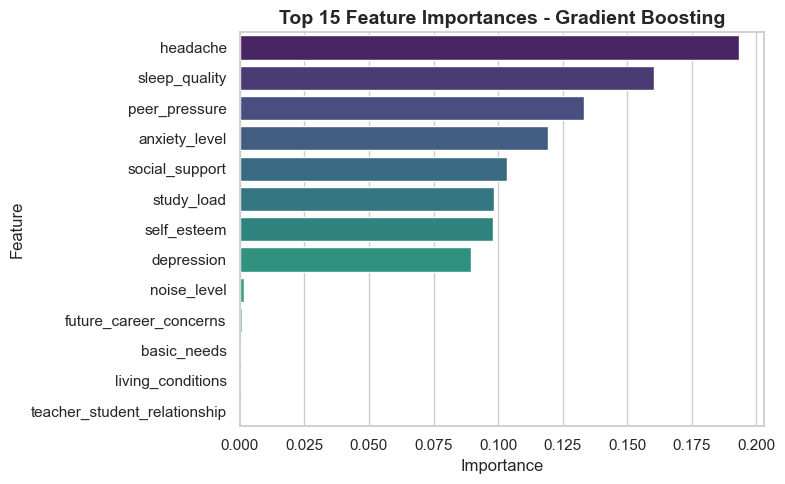

Model Performance:
R² Score: 0.9839
MAE: 0.0368
MSE: 0.0022
RMSE: 0.0470


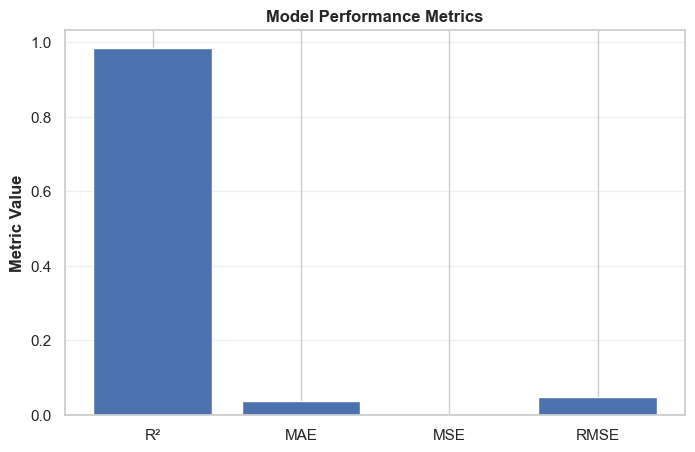

In [139]:
# GRADIENT BOOSTING REGRESSOR FOR SURVEY DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

# 1. Load survey dataset
df = pd.read_csv("Responses_cleaned_final.csv")

# Define target variable
target = 'stress_level'
if target not in df.columns:
    wellbeing_cols = ['anxiety_level', 'self_esteem', 'depression', 'headache', 
                      'sleep_quality', 'social_support', 'peer_pressure', 'study_load']
    df[target] = df[wellbeing_cols].mean(axis=1)

# Features to exclude
exclude_cols = ['Age', 'Gender', 'Year of Study', 'Discipline/Field', target]
feature_cols = [c for c in df.columns if c not in exclude_cols]

X = df[feature_cols]
y = df[target]

# Encode categorical data
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Gradient Boosting Regressor
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

# 3. Predictions & Metrics
y_pred = gb.predict(X_test)
residuals = y_test - y_pred

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

# 4. Feature Importance
feat_imp = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title("Top 15 Feature Importances - Gradient Boosting", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 6. Correlation Heatmap
corr = df[feature_cols + [target]].corr()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

metrics = ['R²', 'MAE', 'MSE', 'RMSE']
values = [r2, mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.title("Model Performance Metrics", fontweight='bold')
plt.ylabel("Metric Value", fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

GRADIENT BOOSTING LEARNING CURVE
Generating learning curve (this may take a moment)...


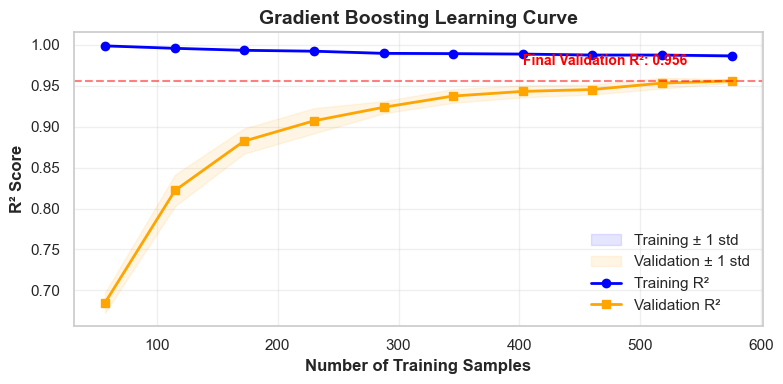


LEARNING CURVE RESULTS:
----------------------------------------
Final Training R²:   0.9866
Final Validation R²: 0.9560
Gap (Train - Val):   0.0306

INTERPRETATION:
✓ Excellent generalization (very small gap)

Model Behavior:
• Learns quickly with small data
• Learning has plateaued

--------------------------------------------------------------------------------
TEST SET EVALUATION
--------------------------------------------------------------------------------
Test R²:  0.9666
Test RMSE: 0.0676

SUMMARY
Gradient Boosting explains 96.7% of variance
Overfitting indicator: 0.031 (smaller is better)


In [168]:
# GRADIENT BOOSTING LEARNING CURVE FOR SURVEY DATA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("GRADIENT BOOSTING LEARNING CURVE")
print("="*80)

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=90,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

print("Generating learning curve (this may take a moment)...")

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    gb_model,
    X_train,
    y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color="blue", label="Training ± 1 std")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.1, color="orange", label="Validation ± 1 std")
plt.plot(train_sizes, train_mean, 'o-', color="blue", 
         label="Training R²", linewidth=2, markersize=6)
plt.plot(train_sizes, val_mean, 's-', color="orange", 
         label="Validation R²", linewidth=2, markersize=6)

plt.xlabel("Number of Training Samples", fontweight='bold', fontsize=12)
plt.ylabel("R² Score", fontweight='bold', fontsize=12)
plt.title("Gradient Boosting Learning Curve", fontweight='bold', fontsize=14)
plt.legend(loc="best", fontsize=11)
plt.grid(True, alpha=0.3)

# Add final performance indicators
final_train = train_mean[-1]
final_val = val_mean[-1]
gap = final_train - final_val

plt.axhline(y=final_val, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
plt.text(train_sizes[-1]*0.7, final_val+0.02, 
         f'Final Validation R²: {final_val:.3f}', 
         fontweight='bold', color='red', fontsize=10)

plt.tight_layout()
plt.show()

# Print results
print("\nLEARNING CURVE RESULTS:")
print("-"*40)
print(f"Final Training R²:   {final_train:.4f}")
print(f"Final Validation R²: {final_val:.4f}")
print(f"Gap (Train - Val):   {gap:.4f}")

# Interpretation
print("\nINTERPRETATION:")
if gap < 0.05:
    print("✓ Excellent generalization (very small gap)")
elif gap < 0.1:
    print("✓ Good generalization (small gap)")
elif gap < 0.2:
    print("⚠️  Moderate overfitting (manageable gap)")
else:
    print("❌ High overfitting (large gap)")

print(f"\nModel Behavior:")
if val_mean[0] > 0.3:  # First point
    print("• Learns quickly with small data")
    
if val_mean[-1] - val_mean[-2] < 0.01:  # Plateau check
    print("• Learning has plateaued")
else:
    print("• Still learning with more data")

# Test set performance
print("\n" + "-"*80)
print("TEST SET EVALUATION")
print("-"*80)

# Train on full training data
gb_model.fit(X_train, y_train)
y_test_pred = gb_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²:  {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Gradient Boosting explains {test_r2*100:.1f}% of variance")
print(f"Overfitting indicator: {gap:.3f} (smaller is better)")

SHAP FOR GRADIENT BOOSTING
Model trained with 100 trees

1. Calculating SHAP values...
SHAP values calculated for 100 samples

2. Feature Importance (SHAP)...


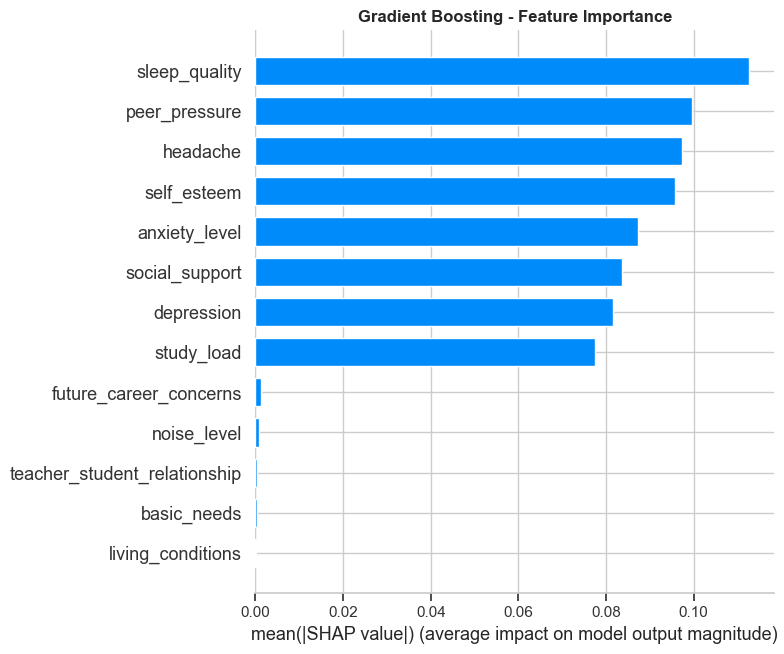


3. Detailed Feature Impact...


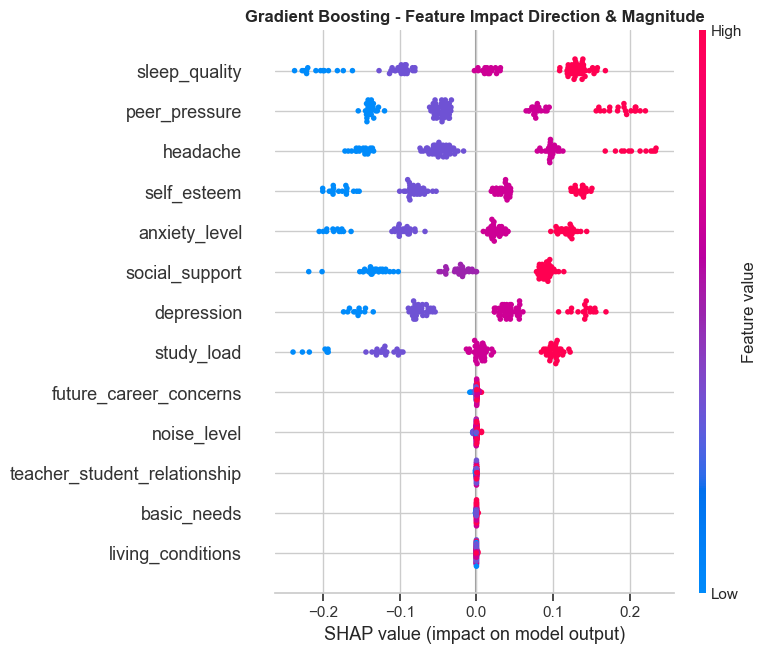


5. Saving SHAP results...
✓ SHAP results saved as 'shap_gradient_boosting_survey.csv'

SHAP INTERPRETATION:

• Gradient Boosting uses 13 features
• Top feature explains 15.3% of model decisions
• Expected value (baseline): 1.7238


In [173]:
# SHAP FOR GRADIENT BOOSTING FOR SURVEY DATA
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

print("="*80)
print("SHAP FOR GRADIENT BOOSTING")
print("="*80)

# Train model (use your already split data)
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

print(f"Model trained with {gbr.n_estimators_} trees")

# SHAP Explainer
print("\n1. Calculating SHAP values...")
explainer = shap.TreeExplainer(gbr)

# Use a SUBSET for speed (SHAP can be slow)
X_val_sample = X_val.iloc[:100]  # First 100 samples for speed
shap_values = explainer.shap_values(X_val_sample)

print(f"SHAP values calculated for {X_val_sample.shape[0]} samples")

# 1. Summary Bar Plot (Feature Importance)
print("\n2. Feature Importance (SHAP)...")
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X_val_sample, plot_type="bar", show=False)
plt.title("Gradient Boosting - Feature Importance", fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Detailed Summary Plot
print("\n3. Detailed Feature Impact...")
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X_val_sample, show=False)
plt.title("Gradient Boosting - Feature Impact Direction & Magnitude", fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Save Results
print("\n5. Saving SHAP results...")
shap_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(0),
    'Mean_SHAP': shap_values.mean(0)
}).sort_values('Mean_Abs_SHAP', ascending=False)

shap_df.to_csv('shap_gradient_boosting_survey.csv', index=False)
print("✓ SHAP results saved as 'shap_gradient_boosting_survey.csv'")

print("\n" + "="*80)
print("SHAP INTERPRETATION:")
print("="*80)
print(f"\n• Gradient Boosting uses {X_val.shape[1]} features")
print(f"• Top feature explains {shap_df.iloc[0]['Mean_Abs_SHAP']/shap_df['Mean_Abs_SHAP'].sum()*100:.1f}% of model decisions")
print(f"• Expected value (baseline): {explainer.expected_value.mean():.4f}")

# XGBoost Regressor

XGBOOST REGRESSOR - BASIC IMPLEMENTATION
Training: 720 samples, Test: 180 samples
Model trained successfully

PERFORMANCE RESULTS:
------------------------------
Training R²:  0.9986
Test R²:      0.9695
Test RMSE:    0.0646
Test MAE:     0.0459
Overfitting:  0.0291
------------------------------

Model Performance:
• R² Score: 0.9695 (96.9% variance explained)
• RMSE: 0.0646 (average error)
• MAE: 0.0459 (mean absolute error)

Model saved as 'xgboost_model.pkl'

XGBoost training complete!
XGBOOST RESULTS VISUALIZATION
XGBOOST - TOP STRESS FACTORS


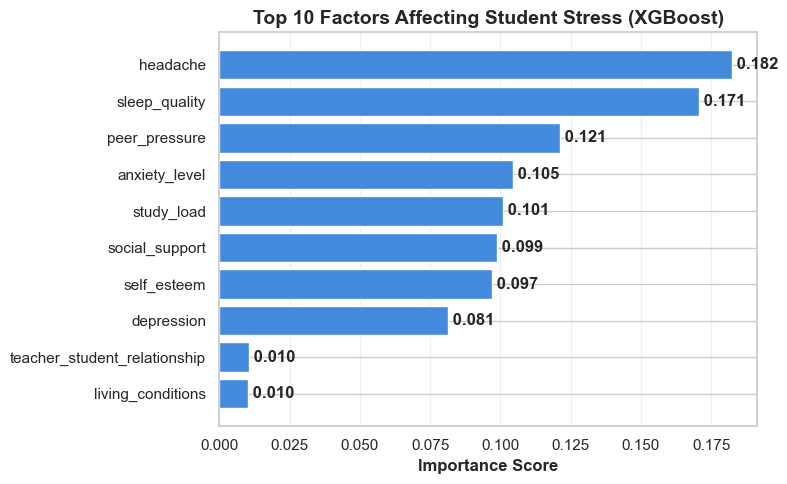


Key Finding:
Most important factor: headache
Importance score: 0.1822


In [182]:
# XGBOOST REGRESSOR FOR SURVEY DATA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("="*80)
print("XGBOOST REGRESSOR - BASIC IMPLEMENTATION")
print("="*80)

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")

# 2. Train model
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train, y_train)
print("Model trained successfully")

# 3. Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 4. Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

# 5. Print results
print("\nPERFORMANCE RESULTS:")
print("-"*30)
print(f"Training R²:  {train_r2:.4f}")
print(f"Test R²:      {test_r2:.4f}")
print(f"Test RMSE:    {test_rmse:.4f}")
print(f"Test MAE:     {test_mae:.4f}")
print(f"Overfitting:  {train_r2 - test_r2:.4f}")
print("-"*30)

print(f"\nModel Performance:")
print(f"• R² Score: {test_r2:.4f} ({test_r2*100:.1f}% variance explained)")
print(f"• RMSE: {test_rmse:.4f} (average error)")
print(f"• MAE: {test_mae:.4f} (mean absolute error)")

# 6. Save model
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("\nModel saved as 'xgboost_model.pkl'")

print("\nXGBoost training complete!")

# SINGLE VISUALIZATION FOR AUDIENCE
import matplotlib.pyplot as plt

print("XGBOOST RESULTS VISUALIZATION")

print("XGBOOST - TOP STRESS FACTORS")

# Get feature importance
importance = xgb_model.feature_importances_
top_10_idx = np.argsort(importance)[-10:][::-1]
top_10_features = X.columns[top_10_idx]
top_10_scores = importance[top_10_idx]

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(range(len(top_10_features)), top_10_scores, color='#438add')
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Importance Score', fontweight='bold')
plt.title('Top 10 Factors Affecting Student Stress (XGBoost)', 
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()

# Add value labels
for i, (feature, score) in enumerate(zip(top_10_features, top_10_scores)):
    plt.text(score, i, f' {score:.3f}', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey Finding:")
print(f"Most important factor: {top_10_features[0]}")
print(f"Importance score: {top_10_scores[0]:.4f}")

LEARNING CURVE - SURVEY DATASET
Generating learning curve...


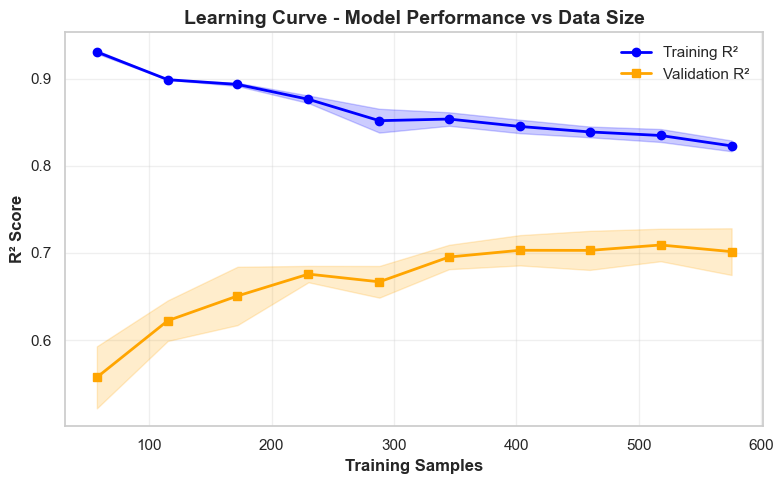


RESULTS:
------------------------------
Final Training R²:   0.8229
Final Validation R²: 0.7015
Overfitting gap:     0.1214
------------------------------

INTERPRETATION:
⚠️  Moderate overfitting
• Learning has plateaued

Learning curve complete!


In [184]:
# LEARNING CURVE FOR SURVEY DATA
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("LEARNING CURVE - SURVEY DATASET")
print("="*80)

# Create model (use your trained model type)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

print("Generating learning curve...")

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train,  # Use training data only
    y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

# Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training R²", linewidth=2)
plt.plot(train_sizes, val_mean, 's-', color="orange", label="Validation R²", linewidth=2)

plt.xlabel("Training Samples", fontweight='bold', fontsize=12)
plt.ylabel("R² Score", fontweight='bold', fontsize=12)
plt.title("Learning Curve - Model Performance vs Data Size", fontweight='bold', fontsize=14)
plt.legend(loc="best", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print results
final_train = train_mean[-1]
final_val = val_mean[-1]
gap = final_train - final_val

print("\nRESULTS:")
print("-"*30)
print(f"Final Training R²:   {final_train:.4f}")
print(f"Final Validation R²: {final_val:.4f}")
print(f"Overfitting gap:     {gap:.4f}")
print("-"*30)

# Interpretation
print("\nINTERPRETATION:")
if gap < 0.05:
    print("✓ Excellent generalization")
elif gap < 0.1:
    print("✓ Good generalization")
elif gap < 0.15:
    print("⚠️  Moderate overfitting")
else:
    print("❌ High overfitting")

if val_mean[-1] - val_mean[-2] < 0.01:
    print("• Learning has plateaued")
else:
    print("• Could benefit from more data")

print("\nLearning curve complete!")

XAI FOR XGBOOST - EXPLAINING STUDENT STRESS PREDICTIONS

1. Calculating SHAP values...
SHAP values calculated for 100 students

2. Feature Importance Analysis...


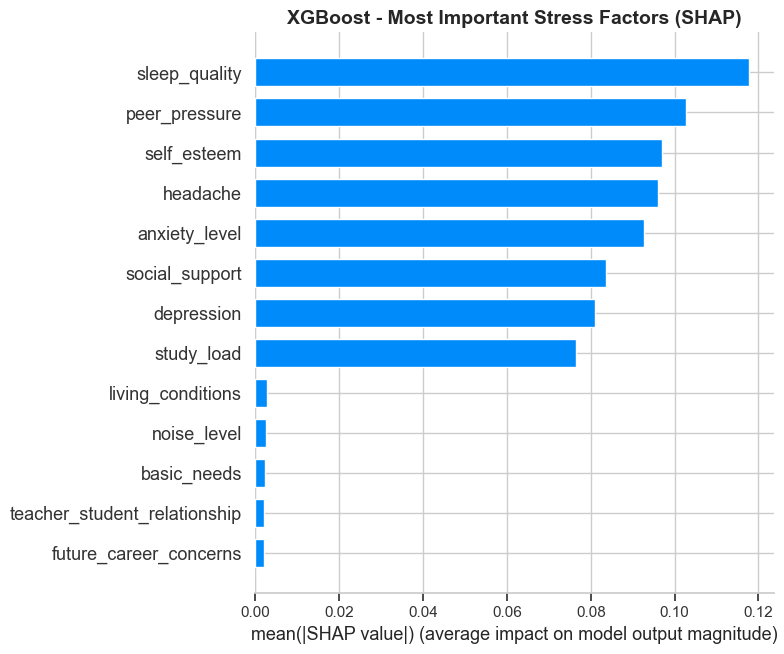


3. How Each Feature Affects Stress...


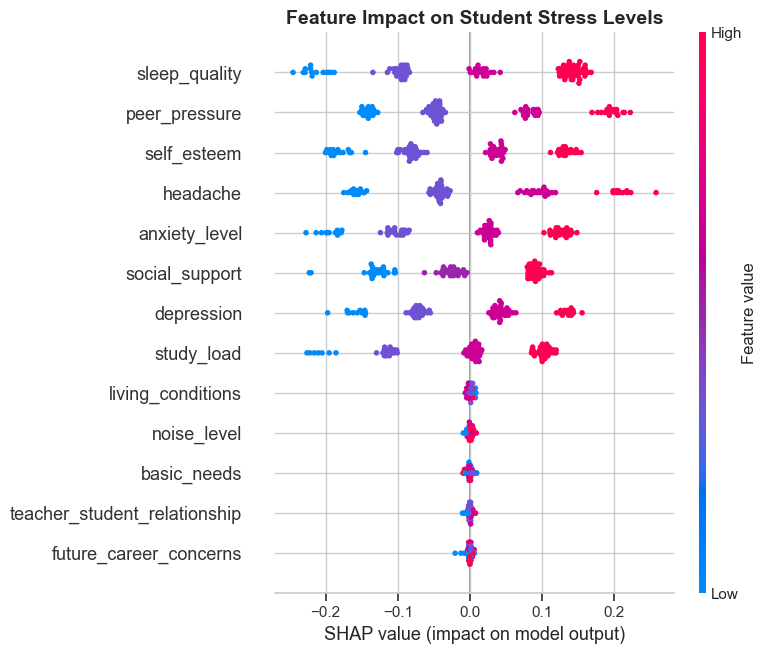


4. Top Feature Detailed Analysis...

Most Important Stress Factor: sleep_quality
SHAP Importance Score: 0.1178


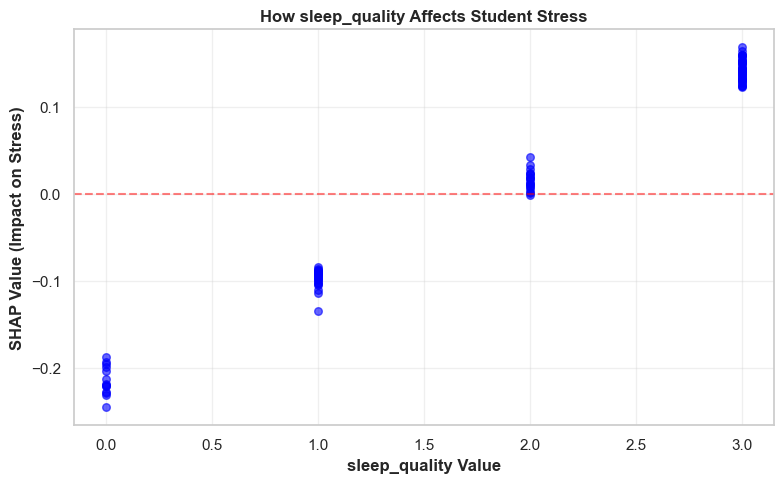


5. Saving XAI Insights...

Top 5 Stress Factors Identified:
sleep_quality: 0.1178 (Increases Stress)
peer_pressure: 0.1027 (Increases Stress)
self_esteem: 0.0971 (Reduces Stress)
headache: 0.0961 (Increases Stress)
anxiety_level: 0.0926 (Reduces Stress)

✓ XAI results saved as 'xgboost_shap_analysis.csv'


In [186]:
# SHAP FOR SURVEY DATA
import shap
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("XAI FOR XGBOOST - EXPLAINING STUDENT STRESS PREDICTIONS")
print("="*80)

# 1. SHAP Explanation
print("\n1. Calculating SHAP values...")
explainer = shap.TreeExplainer(xgb_model)

# Use subset for speed (first 100 samples)
X_test_sample = X_test.iloc[:100]
shap_values = explainer.shap_values(X_test_sample)

print(f"SHAP values calculated for {X_test_sample.shape[0]} students")

# 2. Feature Importance (SHAP)
print("\n2. Feature Importance Analysis...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("XGBoost - Most Important Stress Factors (SHAP)", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Detailed Feature Impact
print("\n3. How Each Feature Affects Stress...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title("Feature Impact on Student Stress Levels", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Top Feature Analysis
print("\n4. Top Feature Detailed Analysis...")
mean_abs_shap = np.abs(shap_values).mean(0)
top_feature_idx = np.argmax(mean_abs_shap)
top_feature = X_test.columns[top_feature_idx]
top_shap_value = mean_abs_shap[top_feature_idx]

print(f"\nMost Important Stress Factor: {top_feature}")
print(f"SHAP Importance Score: {top_shap_value:.4f}")

# Show distribution of this feature
plt.figure(figsize=(8, 5))
plt.scatter(X_test_sample[top_feature], shap_values[:, top_feature_idx], 
            alpha=0.6, s=30, color='blue')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.xlabel(f'{top_feature} Value', fontweight='bold')
plt.ylabel('SHAP Value (Impact on Stress)', fontweight='bold')
plt.title(f'How {top_feature} Affects Student Stress', fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Save XAI Results
print("\n5. Saving XAI Insights...")
import pandas as pd

# Calculate SHAP statistics
shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(0),
    'Mean_SHAP': shap_values.mean(0),
    'Direction': ['Increases Stress' if x > 0 else 'Reduces Stress' for x in shap_values.mean(0)]
}).sort_values('Mean_Abs_SHAP', ascending=False)

print("\nTop 5 Stress Factors Identified:")
for i, row in shap_df.head(5).iterrows():
    print(f"{row['Feature']}: {row['Mean_Abs_SHAP']:.4f} ({row['Direction']})")

# Save to CSV
shap_df.to_csv('xgboost_shap_analysis.csv', index=False)
print("\n✓ XAI results saved as 'xgboost_shap_analysis.csv'")

# 3) Choose features (wearable-measurable / proxy)

Use only features that can be collected from wearables / phone sensors. If you also have raw high-frequency signals (HR, accel) you should create windowed summary features — I provide a short note below for that.

In [14]:
# Keep these if present
feature_candidates = [c for c in [
    'blood_pressure','sleep_quality','breathing_problem','noise_level',
    'headache','anxiety_level','depression','stress_level'  # careful: these might be labels; include only as features if you intend
] if c in df.columns]

# Typically, don't use anxiety/depression/stress as input features if they're your labels.
# So remove them from features if they appear in targets
for t in ['anxiety_level','depression','stress_level']:
    if t in feature_candidates and ('target_psych' in targets or 'target_env' in targets):
        feature_candidates.remove(t)

X = df[feature_candidates].copy()
y = df[targets].copy()

print("Features:", X.columns.tolist())
print("y shape:", y.shape)


Features: ['blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'headache']
y shape: (1100, 3)


# 4) Preprocess + model pipeline (baseline)

We’ll use a robust baseline: MultiOutputClassifier(RandomForest). Use GroupKFold if you have subject_id column — avoids leakage.

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import f1_score, hamming_loss, roc_auc_score

# Imputer & scaler (scaler optional for tree models)
preproc = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

X_prep = preproc.fit_transform(X)

clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42))

# Choose cross-validator: group-wise if possible
if 'subject_id' in df.columns:
    groups = df['subject_id']
    cv = GroupKFold(n_splits=5)
    preds = cross_val_predict(clf, X_prep, y, cv=cv, groups=groups, method='predict')
else:
    # fallback to 5-fold; for multi-label ideally use subject split or iterative stratification
    from sklearn.model_selection import StratifiedKFold
    # create a simple stratifier by first label (approx)
    strat_col = y.iloc[:,0] if y.shape[1]>0 else None
    cv = 5
    preds = cross_val_predict(clf, X_prep, y, cv=cv, method='predict')

preds = pd.DataFrame(preds, columns=y.columns, index=y.index)


# 5) Evaluation (multi-label metrics)

In [16]:
def eval_multi(y_true, y_pred):
    print("Hamming loss:", hamming_loss(y_true, y_pred))
    print("Micro F1:", f1_score(y_true, y_pred, average='micro'))
    print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
    # per-label F1
    for col in y_true.columns:
        print(col, "F1:", f1_score(y_true[col], y_pred[col]))

eval_multi(y, preds)


Hamming loss: 0.07363636363636364
Micro F1: 0.9328543796628903
Macro F1: 0.9347678149556465
target_psych F1: 0.8170829975825947
target_phys F1: 0.987220447284345
target_env F1: 1.0


# 6) Better: predict probabilities + tune per-label threshold

Default threshold=0.5 is not always best. We'll get probabilities (with an actual train/val split) and choose threshold per label maximizing F1.

In [17]:


# train-test split (group-aware if possible)
if 'subject_id' in df.columns:
    # simple group split
    unique_groups = df['subject_id'].unique()
    train_groups, val_groups = train_test_split(unique_groups, test_size=0.2, random_state=42)
    train_idx = df['subject_id'].isin(train_groups)
    val_idx = df['subject_id'].isin(val_groups)
else:
    train_idx, val_idx = train_test_split(df.index, test_size=0.2, random_state=42)

X_tr, X_val = X_prep[train_idx], X_prep[val_idx]
y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

clf.fit(X_tr, y_tr)
probas = clf.predict_proba(X_val)  # list of arrays, one per label

# get best threshold per label
best_thresh = {}
y_pred_thresh = np.zeros_like(y_val.values)
for i, col in enumerate(y_val.columns):
    # predict_proba returns (n_samples, 2) for binary; take column 1
    p = probas[i][:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_val.iloc[:,i], p)
    f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-9)
    best_idx = np.nanargmax(f1_scores)
    # threshold array is one shorter than precisions; handle edge
    if best_idx >= len(thresholds):
        thr = 0.5
    else:
        thr = thresholds[best_idx]
    best_thresh[col] = float(thr)
    y_pred_thresh[:, i] = (p >= thr).astype(int)

y_pred_thresh = pd.DataFrame(y_pred_thresh, columns=y_val.columns, index=y_val.index)
eval_multi(y_val, y_pred_thresh)
print("Chosen thresholds per label:", best_thresh)


Hamming loss: 0.06666666666666667
Micro F1: 0.9385474860335196
Macro F1: 0.9458573172858887
target_psych F1: 0.8498168498168498
target_phys F1: 0.9877551020408163
target_env F1: 1.0
Chosen thresholds per label: {'target_psych': 0.14532842157842157, 'target_phys': 0.525, 'target_env': 0.935}
